# DESCRIPTIVE AND VISUAL ANALYSIS OF FIFA 22 PLAYER RATINGS
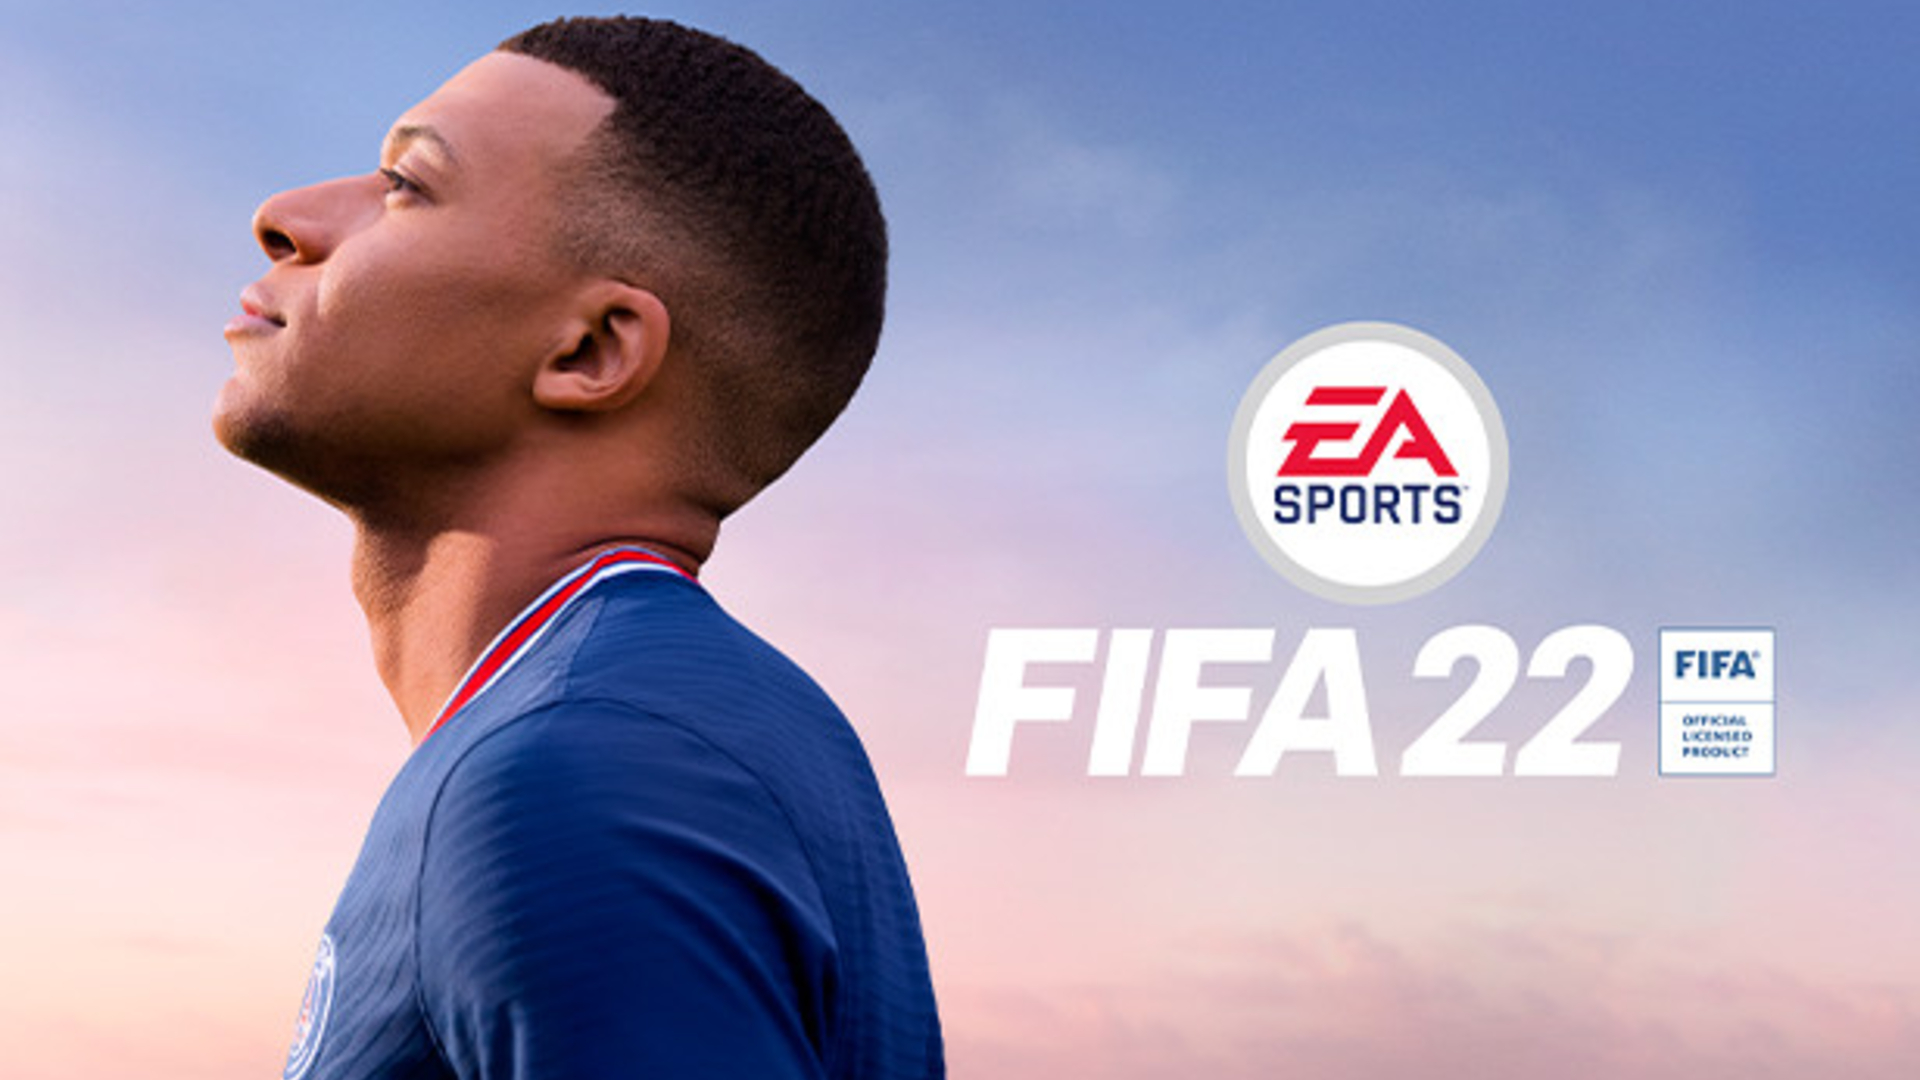

FIFA 22 is a football simulation video game published by Electronic Arts. It is the 29th installment in the FIFA series, and was released worldwide on 1 October 2021 for Microsoft Windows, Nintendo Switch, PlayStation 4, PlayStation 5, Xbox One and Xbox Series X/S.[Wikipedia](https://https://en.wikipedia.org/wiki/FIFA_22)

In this project I tried to answer questions such as the who is highest paid player, best player, fastest player, best finisher using descriptive and visual analysis.

I used Google Colab to carry out this project.

The FIFA 22 Dataset I used can be found at [Kaggle.](https://https://www.kaggle.com/datasets/stefanoleone992/fifa-22-complete-player-dataset)

## Import the Required Libraries

In [ ]:
# Common imports
import numpy as np
import pandas as pd
import os
import seaborn as sns
from scipy import stats
import missingno as msno
import math

# To plot pretty figures
%matplotlib inline
import matplotlib as mpl
import matplotlib.pyplot as plt
from matplotlib import style
sns.set(style='ticks', color_codes=True)
sns.set(style='darkgrid')
import plotly.express as px

# Ignore useless warnings (see SciPy issue #5998)
import warnings
warnings.filterwarnings(action="ignore", message="^internal gelsd")
warnings.filterwarnings('always')
warnings.filterwarnings('ignore')

Installing other requirements like kaggle for loading the dataset

In [ ]:
! pip install wordcloud

In [ ]:
from wordcloud import WordCloud

Installing the kaggle libraries for interacting with the kaggle api and uploading my kaggle api key to my environment.

In [ ]:
! pip install -q kaggle
from google.colab import files

files.upload()

Saving kaggle.json to kaggle.json


{'kaggle.json': b'{"username":"ifeanyinneji","key":"8b2bf57c9f908889794304ca6d672b54"}'}

In [ ]:
! mkdir ~/.kaggle

! cp kaggle.json ~/.kaggle/

Downloading the kaggle fifa dataset into my colab environment

In [ ]:
! kaggle datasets download -d stefanoleone992/fifa-22-complete-player-dataset

 82% 89.0M/109M [00:00<00:00, 105MB/s]
100% 109M/109M [00:01<00:00, 110MB/s] 


Unzipping the contents of the zip dataset into our environment. In this case I'll be working with the 'players_22.csv' file.

In [ ]:
! unzip fifa-22-complete-player-dataset.zip 


Archive:  fifa-22-complete-player-dataset.zip
  inflating: Career Mode female player datasets - FIFA 16-22.xlsx  
  inflating: Career Mode player datasets - FIFA 15-22.xlsx  
  inflating: female_players_16.csv   
  inflating: female_players_17.csv   
  inflating: female_players_18.csv   
  inflating: female_players_19.csv   
  inflating: female_players_20.csv   
  inflating: female_players_21.csv   
  inflating: female_players_22.csv   
  inflating: players_15.csv          
  inflating: players_16.csv          
  inflating: players_17.csv          
  inflating: players_18.csv          
  inflating: players_19.csv          
  inflating: players_20.csv          
  inflating: players_21.csv          
  inflating: players_22.csv          


Reading the csv file with pandas and displaying the first 5 rows of the dataset

In [ ]:
fifa = pd.read_csv('players_22.csv')
fifa.head()

sofifa_id                                         player_url  \
0     158023  https://sofifa.com/player/158023/lionel-messi/...   
1     188545  https://sofifa.com/player/188545/robert-lewand...   
2      20801  https://sofifa.com/player/20801/c-ronaldo-dos-...   
3     190871  https://sofifa.com/player/190871/neymar-da-sil...   
4     192985  https://sofifa.com/player/192985/kevin-de-bruy...   

          short_name                            long_name player_positions  \
0           L. Messi       Lionel Andrés Messi Cuccittini       RW, ST, CF   
1     R. Lewandowski                   Robert Lewandowski               ST   
2  Cristiano Ronaldo  Cristiano Ronaldo dos Santos Aveiro           ST, LW   
3          Neymar Jr        Neymar da Silva Santos Júnior          LW, CAM   
4       K. De Bruyne                      Kevin De Bruyne          CM, CAM   

   overall  potential    value_eur  wage_eur  age  ...   lcb    cb   rcb  \
0       93         93   78000000.0  320000.0   34  ...  50+3  50+3  50+3   
1       92         92  119500000.0  270000.0   32  ...  60+3  60+3  60+3   
2       91         91   45000000.0  270000.0   36  ...  53+3  53+3  53+3   
3       91         91  129000000.0  270000.0   29  ...  50+3  50+3  50+3   
4       91         91  125500000.0  350000.0   30  ...  69+3  69+3  69+3   

     rb    gk                                    player_face_url  \
0  61+3  19+3  https://cdn.sofifa.net/players/158/023/22_120.png   
1  61+3  19+3  https://cdn.sofifa.net/players/188/545/22_120.png   
2  60+3  20+3  https://cdn.sofifa.net/players/020/801/22_120.png   
3  62+3  20+3  https://cdn.sofifa.net/players/190/871/22_120.png   
4  75+3  21+3  https://cdn.sofifa.net/players/192/985/22_120.png   

                            club_logo_url  \
0  https://cdn.sofifa.net/teams/73/60.png   
1  https://cdn.sofifa.net/teams/21/60.png   
2  https://cdn.sofifa.net/teams/11/60.png   
3  https://cdn.sofifa.net/teams/73/60.png   
4  https://cdn.sofifa.net/teams/10/60.png   

                             club_flag_url  \
0      https://cdn.sofifa.net/flags/fr.png   
1      https://cdn.sofifa.net/flags/de.png   
2  https://cdn.sofifa.net/flags/gb-eng.png   
3      https://cdn.sofifa.net/flags/fr.png   
4  https://cdn.sofifa.net/flags/gb-eng.png   

                            nation_logo_url  \
0  https://cdn.sofifa.net/teams/1369/60.png   
1  https://cdn.sofifa.net/teams/1353/60.png   
2  https://cdn.sofifa.net/teams/1354/60.png   
3                                       NaN   
4  https://cdn.sofifa.net/teams/1325/60.png   

                       nation_flag_url  
0  https://cdn.sofifa.net/flags/ar.png  
1  https://cdn.sofifa.net/flags/pl.png  
2  https://cdn.sofifa.net/flags/pt.png  
3  https://cdn.sofifa.net/flags/br.png  
4  https://cdn.sofifa.net/flags/be.png  

[5 rows x 110 columns]

Getting the column names in the dataset.

In [ ]:
print(list(fifa.columns))

['sofifa_id', 'player_url', 'short_name', 'long_name', 'player_positions', 'overall', 'potential', 'value_eur', 'wage_eur', 'age', 'dob', 'height_cm', 'weight_kg', 'club_team_id', 'club_name', 'league_name', 'league_level', 'club_position', 'club_jersey_number', 'club_loaned_from', 'club_joined', 'club_contract_valid_until', 'nationality_id', 'nationality_name', 'nation_team_id', 'nation_position', 'nation_jersey_number', 'preferred_foot', 'weak_foot', 'skill_moves', 'international_reputation', 'work_rate', 'body_type', 'real_face', 'release_clause_eur', 'player_tags', 'player_traits', 'pace', 'shooting', 'passing', 'dribbling', 'defending', 'physic', 'attacking_crossing', 'attacking_finishing', 'attacking_heading_accuracy', 'attacking_short_passing', 'attacking_volleys', 'skill_dribbling', 'skill_curve', 'skill_fk_accuracy', 'skill_long_passing', 'skill_ball_control', 'movement_acceleration', 'movement_sprint_speed', 'movement_agility', 'movement_reactions', 'movement_balance', 'power

Turning the CSV file, 'players_22.csv' into a pandas Dataframe.

In [ ]:
fifa_df=pd.DataFrame(fifa)

Setting the new columns that will be used for analysis.

In [ ]:
new_columns = ['long_name', 'player_positions', 'overall', 'potential', 'value_eur', 'wage_eur', 'age', 'dob', 'height_cm', 'weight_kg', 'club_name', 'league_name', 'league_level', 'club_position', 'club_loaned_from', 'club_joined', 'club_contract_valid_until', 'nationality_name', 'nation_team_id', 'nation_position', 'preferred_foot', 'weak_foot', 'skill_moves', 'international_reputation', 'work_rate', 'body_type', 'real_face', 'release_clause_eur', 'player_tags', 'player_traits', 'pace', 'shooting', 'passing', 'dribbling', 'defending', 'physic', 'attacking_crossing', 'attacking_finishing', 'attacking_heading_accuracy', 'attacking_short_passing', 'attacking_volleys', 'skill_dribbling', 'skill_curve', 'skill_fk_accuracy', 'skill_long_passing', 'skill_ball_control', 'movement_acceleration', 'movement_sprint_speed', 'movement_agility', 'movement_reactions', 'movement_balance', 'power_shot_power', 'power_jumping', 'power_stamina', 'power_strength', 'power_long_shots', 'mentality_aggression', 'mentality_interceptions', 'mentality_positioning', 'mentality_vision', 'mentality_penalties', 'mentality_composure', 'defending_marking_awareness', 'defending_standing_tackle', 'defending_sliding_tackle', 'goalkeeping_diving', 'goalkeeping_handling', 'goalkeeping_kicking', 'goalkeeping_positioning', 'goalkeeping_reflexes', 'goalkeeping_speed','ls', 'st', 'rs', 'lw', 'lf', 'cf', 'rf', 'rw', 'lam', 'cam', 'ram', 'lm', 'lcm', 'cm', 'rcm', 'rm', 'lwb', 'ldm', 'cdm', 'rdm', 'rwb', 'lb', 'lcb', 'cb', 'rcb', 'rb', 'gk']


In [ ]:
fifa_df=fifa[new_columns]

Getting the first 5 rows of the Dataset.

In [ ]:
fifa_df.head()

long_name player_positions  overall  potential  \
0       Lionel Andrés Messi Cuccittini       RW, ST, CF       93         93   
1                   Robert Lewandowski               ST       92         92   
2  Cristiano Ronaldo dos Santos Aveiro           ST, LW       91         91   
3        Neymar da Silva Santos Júnior          LW, CAM       91         91   
4                      Kevin De Bruyne          CM, CAM       91         91   

     value_eur  wage_eur  age         dob  height_cm  weight_kg  ...   ldm  \
0   78000000.0  320000.0   34  1987-06-24        170         72  ...  64+3   
1  119500000.0  270000.0   32  1988-08-21        185         81  ...  66+3   
2   45000000.0  270000.0   36  1985-02-05        187         83  ...  59+3   
3  129000000.0  270000.0   29  1992-02-05        175         68  ...  63+3   
4  125500000.0  350000.0   30  1991-06-28        181         70  ...  80+3   

    cdm   rdm   rwb    lb   lcb    cb   rcb    rb    gk  
0  64+3  64+3  66+3  61+3  50+3  50+3  50+3  61+3  19+3  
1  66+3  66+3  64+3  61+3  60+3  60+3  60+3  61+3  19+3  
2  59+3  59+3  63+3  60+3  53+3  53+3  53+3  60+3  20+3  
3  63+3  63+3  67+3  62+3  50+3  50+3  50+3  62+3  20+3  
4  80+3  80+3  79+3  75+3  69+3  69+3  69+3  75+3  21+3  

[5 rows x 98 columns]

## VISUAL ANALYSIS OF FIFA 22 PLAYER RATINGS

In this section I used bar charts, pie charts, scatter plots etc to carry out visual analysis and gain insight from the dataset.

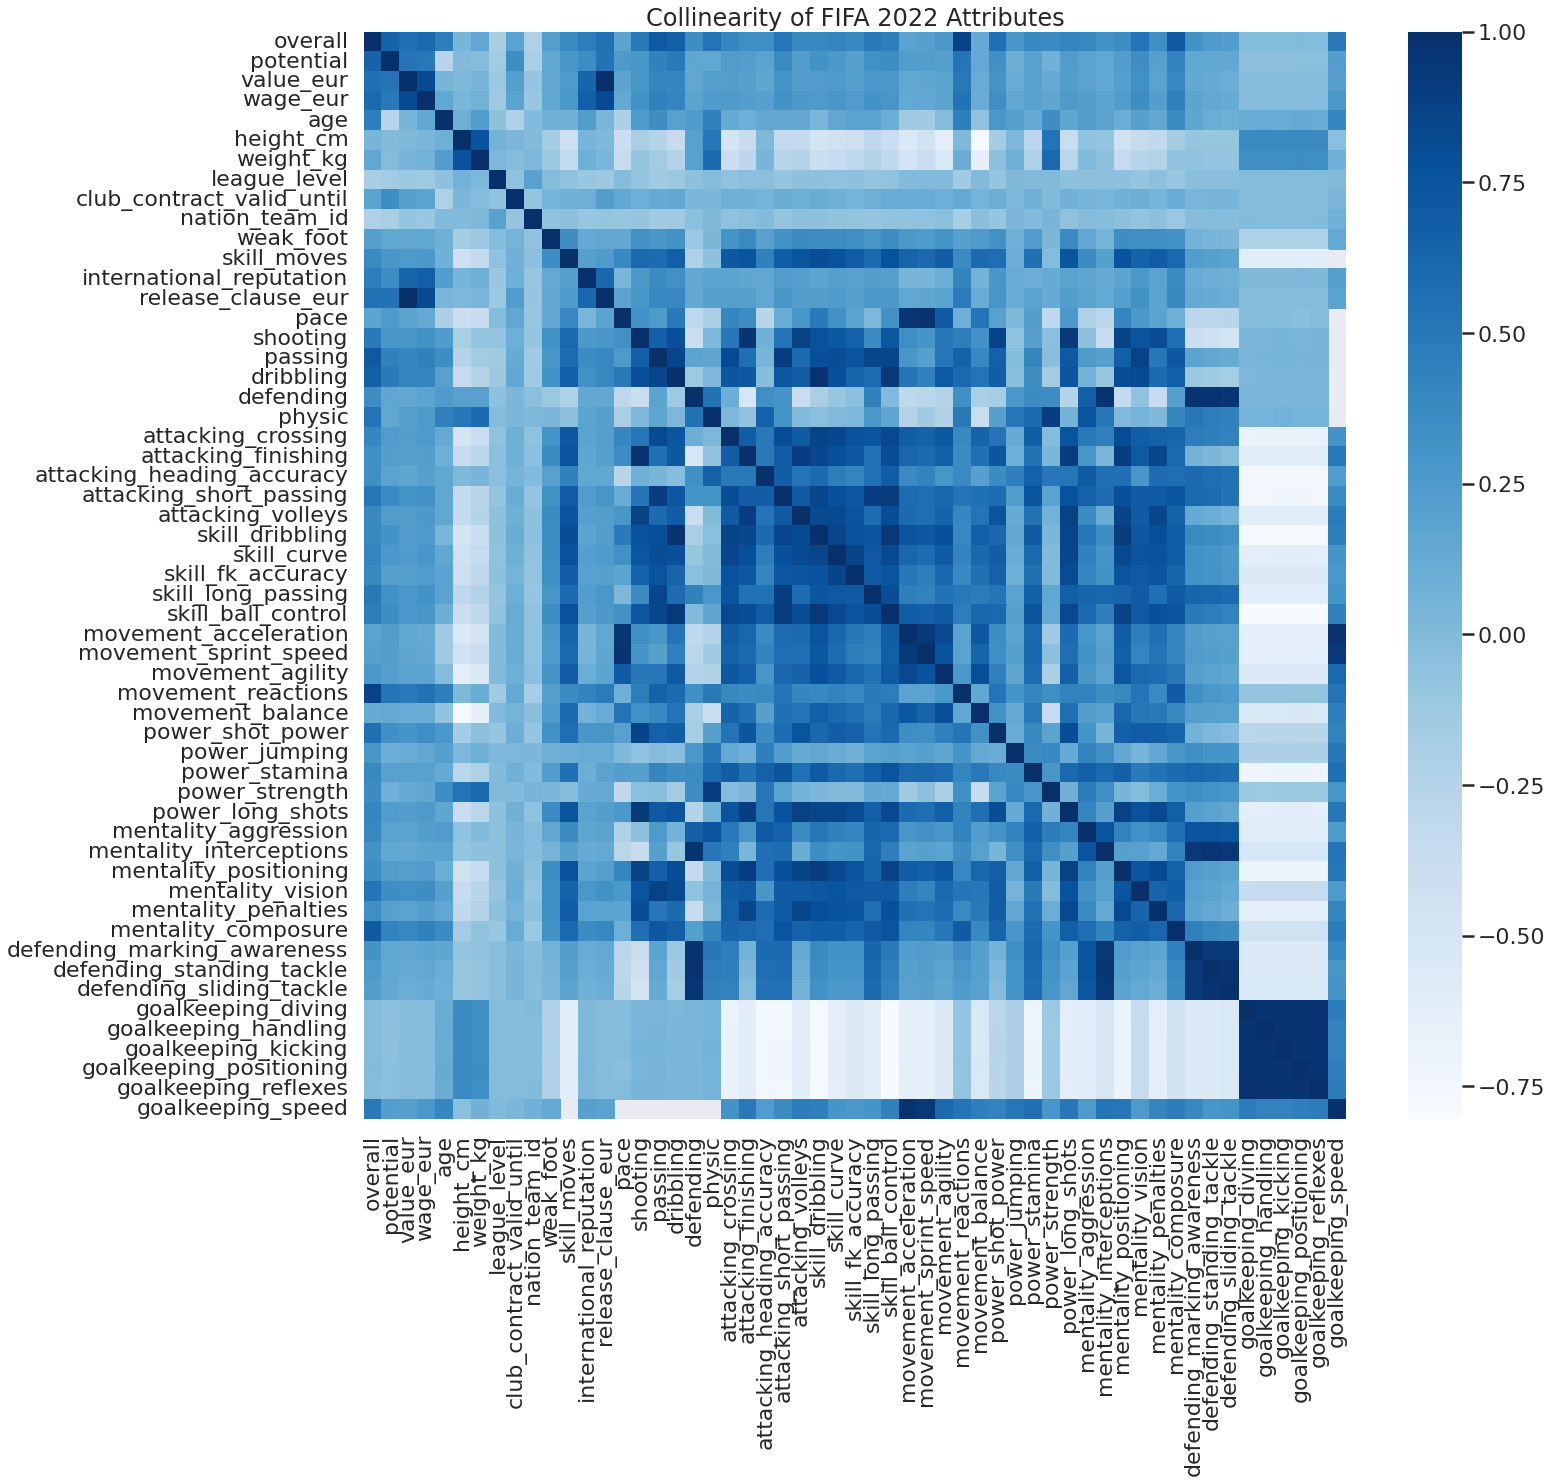

In [ ]:
fig, ax = plt.subplots(figsize=(22,20))
sns.set_context('poster')
corr = fifa_df.corr()
sns.heatmap(corr, xticklabels=corr.columns, yticklabels=corr.columns,cmap='Blues')
ax.set_title('Collinearity of FIFA 2022 Attributes')
plt.savefig('cormap.png')

### WordCloud of Nationalities and Clubs. 
A word cloud is a collection, or cluster, of words depicted in different sizes. The bigger and bolder the word appears, the more often it’s mentioned within a given text and the more important it is.

Word Cloud of Nationalities

(-0.5, 1999.5, 1199.5, -0.5)

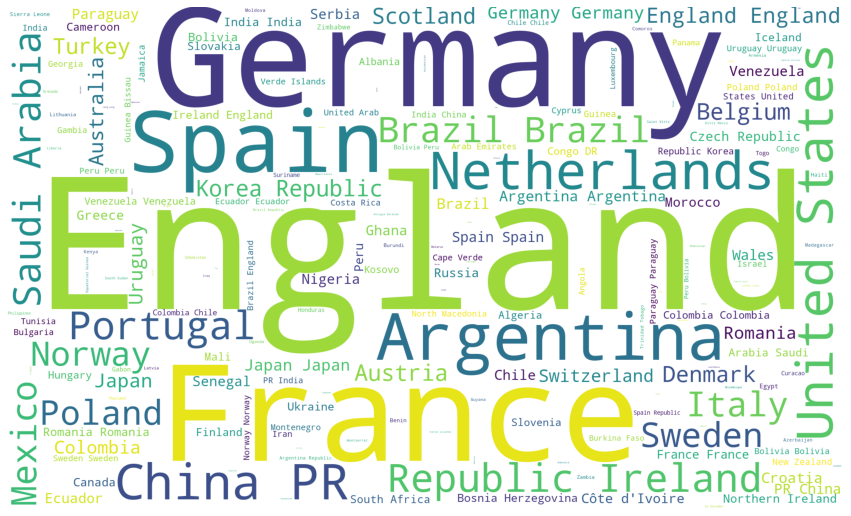

In [ ]:
d_frame = fifa_df.nationality_name

plt.subplots(figsize=(15,15))
wordcloud = WordCloud(
                   background_color='white',
                        width = 2000,
                        height = 1200
    ).generate(" ".join(d_frame))

plt.imshow(wordcloud)
plt.axis('off')

Names of Most frequently mentioned Countries

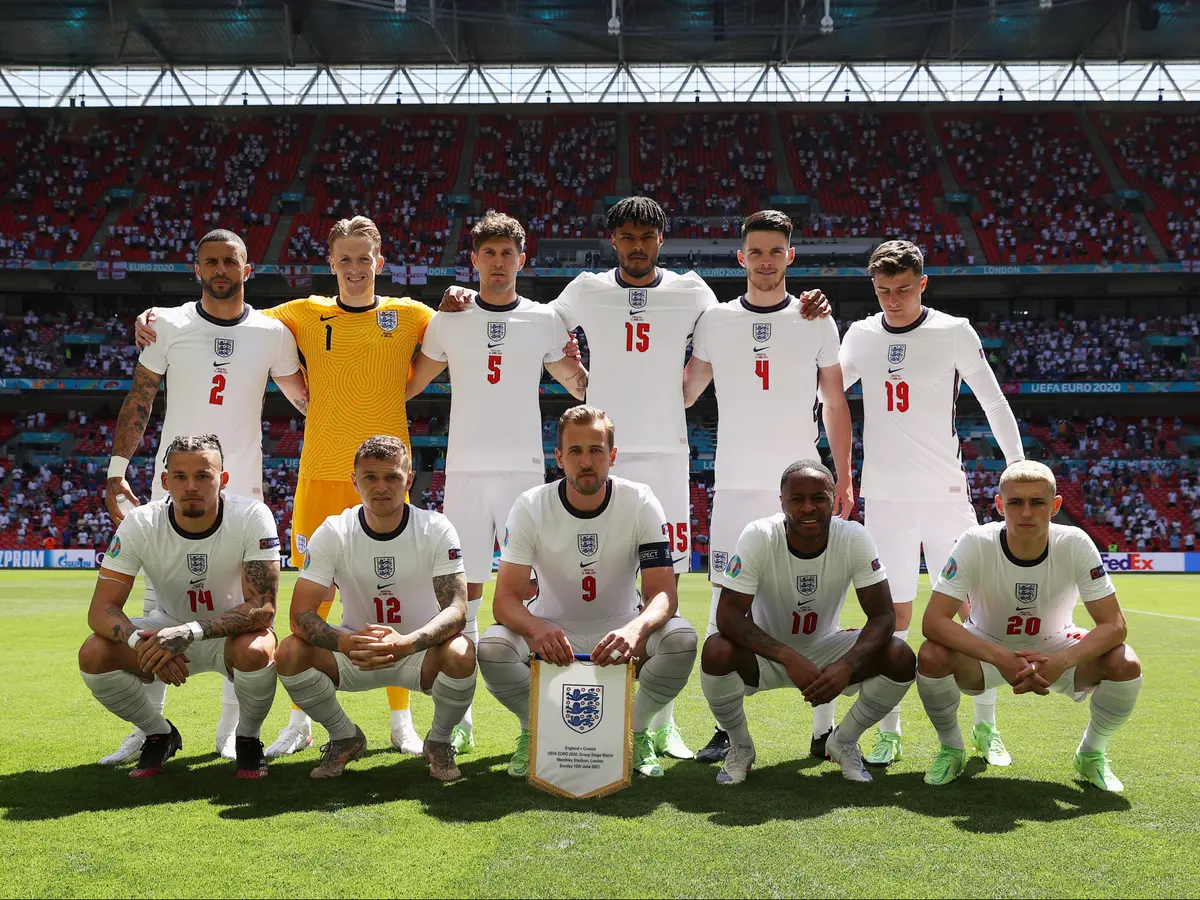

In [ ]:
fifa_df.groupby("nationality_name").long_name.count().sort_values(ascending=False).head(10)/100

nationality_name
England          17.19
Germany          12.14
Spain            10.86
France            9.80
Argentina         9.60
Brazil            8.97
Japan             5.46
Netherlands       4.39
United States     4.13
Poland            4.03
Name: long_name, dtype: float64

Word Cloud of Club Names

(-0.5, 1999.5, 1199.5, -0.5)

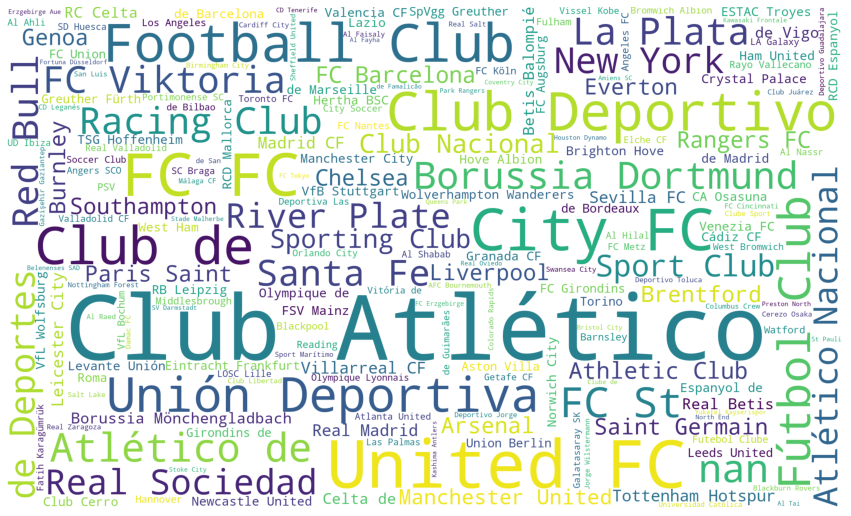

In [ ]:
# Word Cloud of Club Names
fifa_df['club_name']= fifa_df['club_name'].apply(str) # Convert Club names to string because some clubs have numbers in their name e.g Schalke 04
d_frame = fifa_df.club_name

plt.subplots(figsize=(15,15))
wordcloud = WordCloud(
                   background_color='white',
                        width = 2000,
                        height = 1200
    ).generate(" ".join(d_frame))

plt.imshow(wordcloud)
plt.axis('off')

Occurence of Club Names

In [ ]:
fifa_df.groupby("club_name").long_name.count().sort_values(ascending=False).head(10)/100

club_name
nan                          0.61
Real Betis Balompié          0.33
ESTAC Troyes                 0.33
Newcastle United             0.33
RCD Espanyol de Barcelona    0.33
RCD Mallorca                 0.33
Arsenal                      0.33
Brighton & Hove Albion       0.33
Villarreal CF                0.33
Brentford                    0.33
Name: long_name, dtype: float64

### Top 20 Best FIFA 22 Players Based on Overall Rating

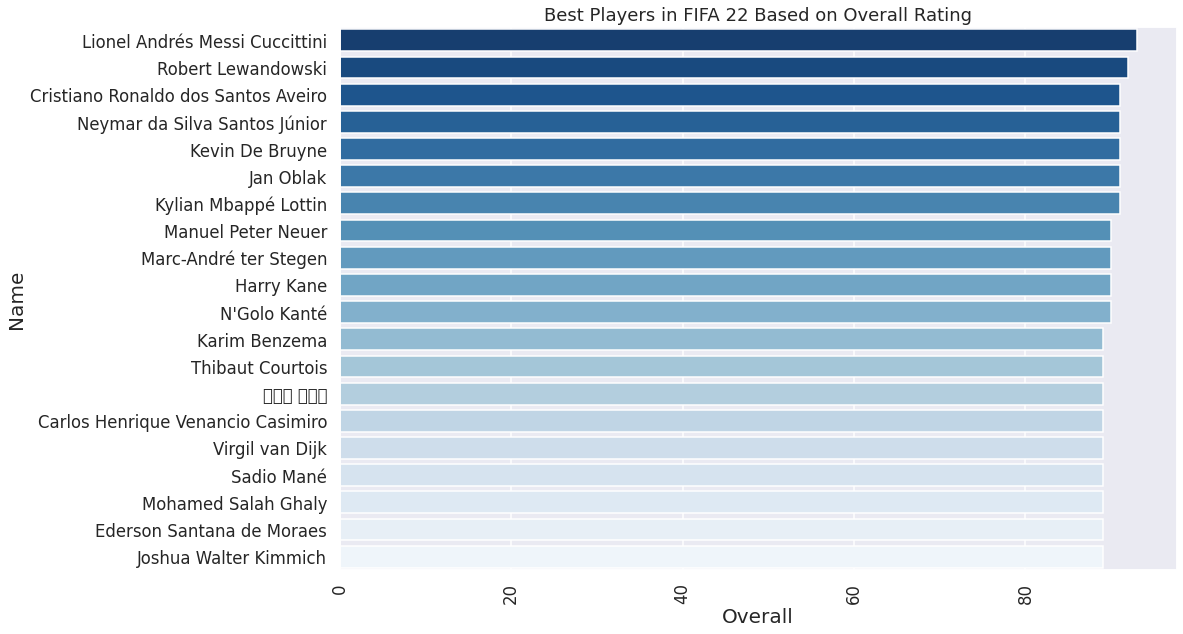

<Figure size 432x288 with 0 Axes>

In [ ]:
Overall = fifa_df["overall"]
Player_name = fifa_df["long_name"]


data = pd.DataFrame({'long_name': Player_name,'overall':Overall})

x = data.long_name.head(20)  
y = data.overall.head(20)

sns.set_context('talk')
plt.figure(figsize=(15,10))

ax= sns.barplot(x=y, y=x,palette ='Blues_r') 
plt.xticks(rotation= 90)
plt.xlabel('Overall', size = 20) 
plt.ylabel('Name', size = 20 ) 
plt.title('Best Players in FIFA 22 Based on Overall Rating') # title
plt.show()
plt.savefig('Top20.png')
for p in ax.patches:
    ax.annotate(str(p.get_height()), (p.get_x()-0.1, p.get_height()+30))

It can be seen from the chart that Lionel Messi who currently plays for Paris Saint German is the best player in FIFA 22.  

### Players Preferred foot

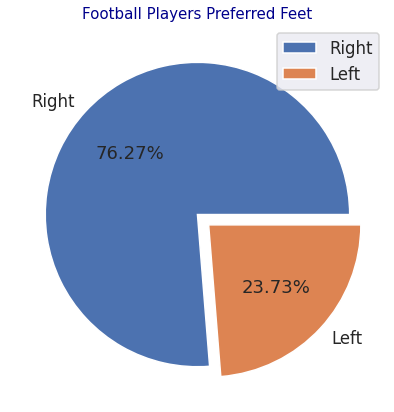

In [ ]:
# Which foot does the footballers in fifa 21 use more?
preferred_foot_labels = fifa_df["preferred_foot"].value_counts().index # (Right,Left) 
preferred_foot_values = fifa_df["preferred_foot"].value_counts().values # (Right Values, Left Values)
explode = (0, 0.1) # used to separate a slice of cake

# Visualize
plt.figure(figsize = (7,7))
plt.pie(preferred_foot_values, labels=preferred_foot_labels,explode=explode, autopct='%1.2f%%')
plt.title('Football Players Preferred Feet',color = 'darkblue',fontsize = 15)
plt.legend()
#plt.show()
plt.savefig('Foot Piechart.jpg')

It can be seen from the pie chart that a very high percentage of players are right-footed.

### Top 10 Highest Paid Players in FIFA 22 and their Respective Nationalities

Text(0.5, 0, 'Total wages')

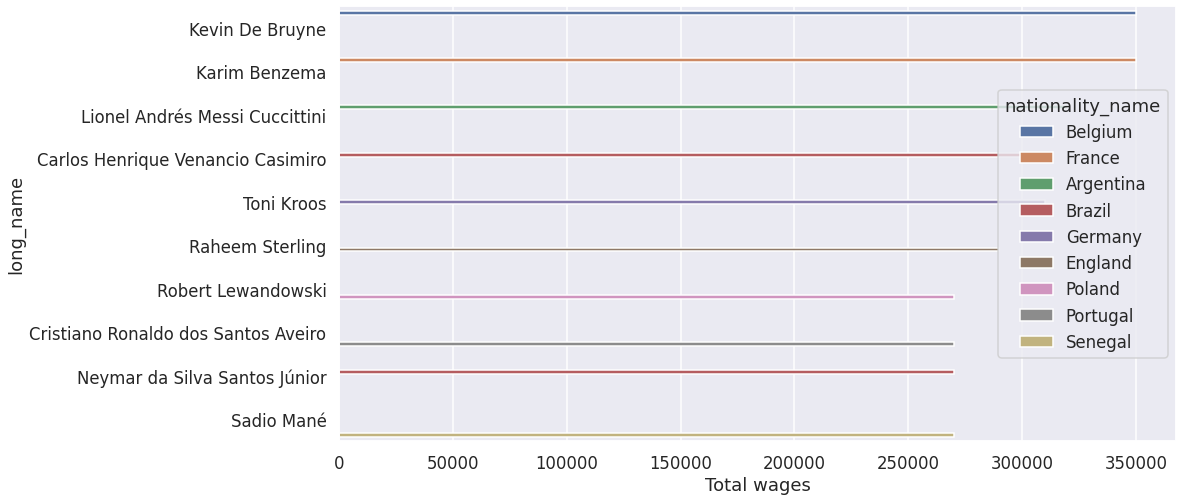

In [ ]:
# TOp 10 Players with the highest wages with Nationality
plt.figure(figsize=(15,8))
player_name = fifa_df.nlargest(10, ['wage_eur']).set_index('long_name')
sns.barplot(player_name['wage_eur'], player_name.index, ci = None, hue = player_name['nationality_name'],palette="deep")
plt.xlabel('Total wages')

It can be seen from the bar chart that Kevin De Bruyne who plays for Manchester City FC in the English Premier League is the highest paid player in FIFA 22.

### Top 10 Highest Paid Players and their Clubs 

Text(0.5, 0, 'Total wages')

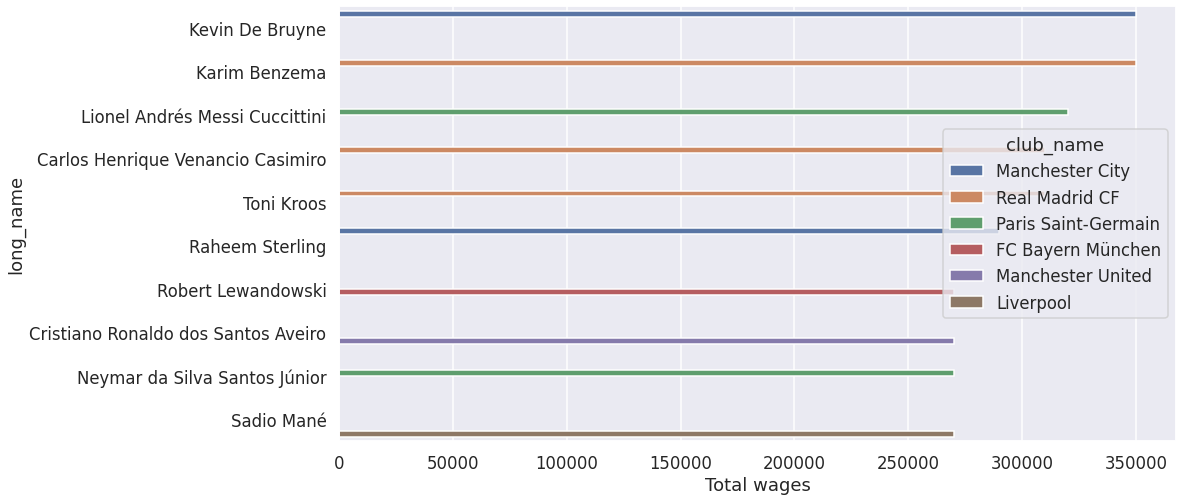

In [ ]:

plt.figure(figsize=(15,8))
player_name = fifa_df.nlargest(10, ['wage_eur']).set_index('long_name')
sns.barplot(player_name['wage_eur'], player_name.index, ci = None, hue = player_name['club_name'],palette="deep")
plt.xlabel('Total wages')

### Player Height Distribution 

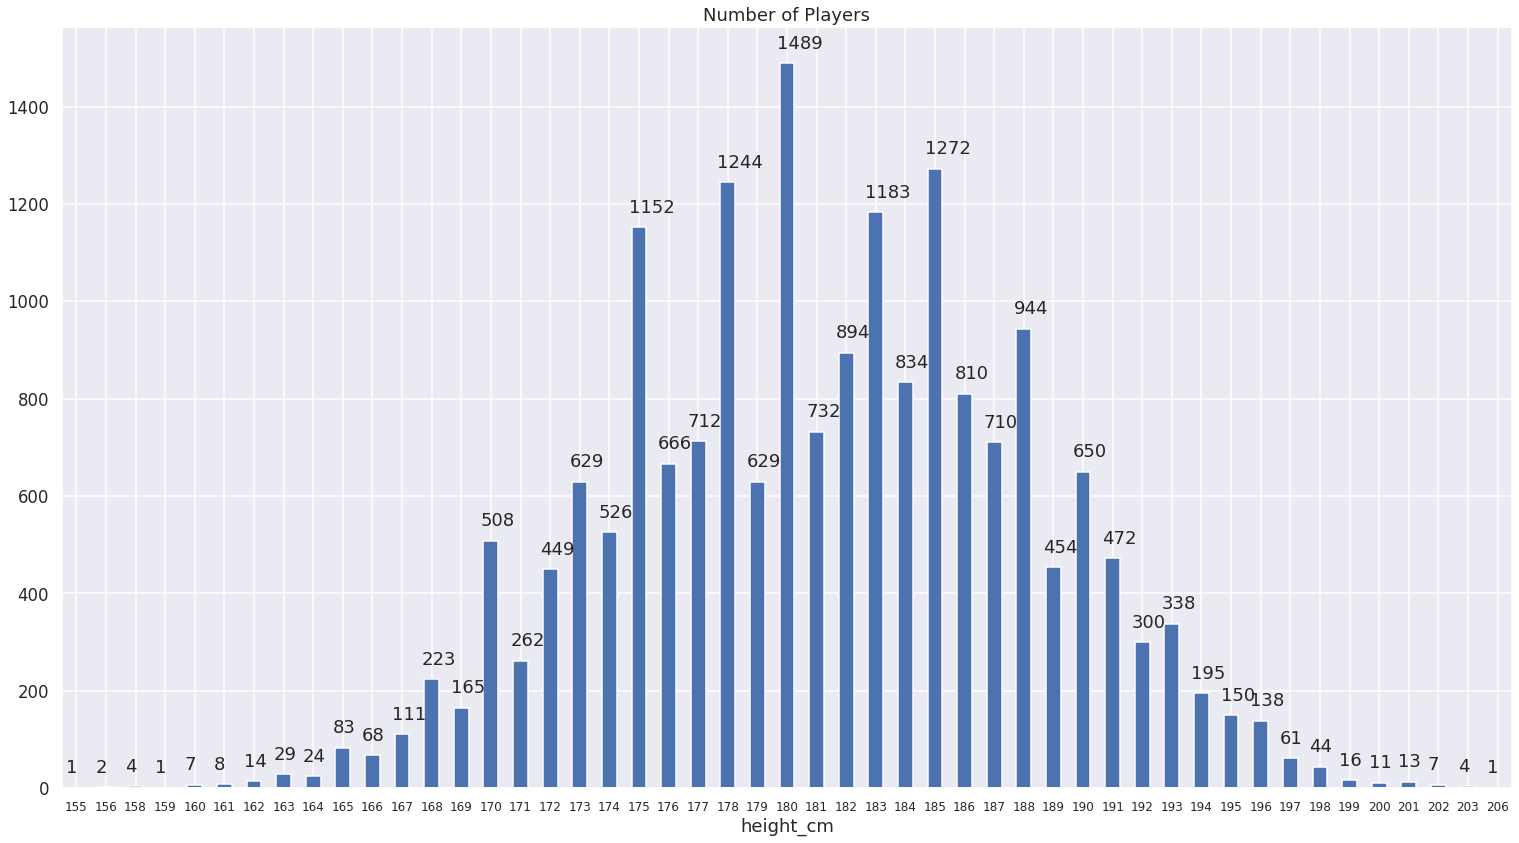

In [ ]:
# Player Height Distribution
sns.set_style('darkgrid')
sns.set_context('talk')
plt.figure(figsize=(26,14))
ax = fifa_df.groupby('height_cm')['long_name'].count().plot.bar()
plt.title('Number of Players')
plt.xticks(fontsize = 12,rotation=0)
for p in ax.patches:
    ax.annotate(str(p.get_height()), (p.get_x()-0.1, p.get_height()+30))
plt.savefig('heightplot.png')

This chart shows that most player heights average around 180cm in FIFA 22.

### Degrees of Players and Skill Moves Rating

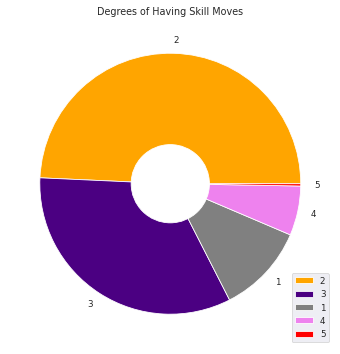

In [ ]:
# Distribution of Skill Moves


sns.set_context('paper')
skill_moves_labels = fifa_df["skill_moves"].value_counts().index #(1.0,2.0,3.0,4.0,5.0)
skill_moves_values = fifa_df["skill_moves"].value_counts().values # values
colors = ['orange','indigo','grey','violet','red']

# visualize
# create a circle for the center of plot
plt.figure(figsize = (6,6))
circle = plt.Circle((0,0),0.3,color = "white") # we create a hole in the middle 
plt.pie(skill_moves_values, labels = skill_moves_labels, colors = colors)
p = plt.gcf()
p.gca().add_artist(circle) # we add the hole to the chart
plt.title("Degrees of Players and Skill Moves Rating")
plt.legend()
#plt.show()
plt.savefig('DonutChartSkillMove.png')


Skill moves are special tricks a player can execute in order to **beat his man** i.e get past a player or just to taunt a player. A player having a rating of 5 for skill moves means the player can execute all the skills in the game. It can be seen though that there is a very little amount of players who have 5 star skill rating in FIFA 22. 

### Relationship between Player Potential and Wage

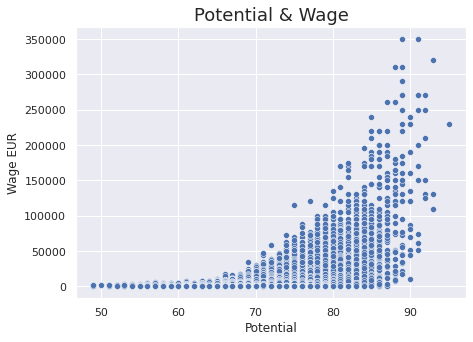

<Figure size 432x288 with 0 Axes>

In [ ]:
# Plotting Potential against Wage
plt.figure(figsize=(7, 5))
ax = sns.scatterplot(x =fifa_df['potential'], y = fifa_df['wage_eur'])
plt.xlabel("Potential") 
plt.ylabel("Wage EUR")
plt.title("Potential & Wage", fontsize = 18)
plt.show()
plt.savefig('chart1.png')

It can be seen from this scatter plot that player wage increases as player potential increases.

### Relationship between Age and Wage

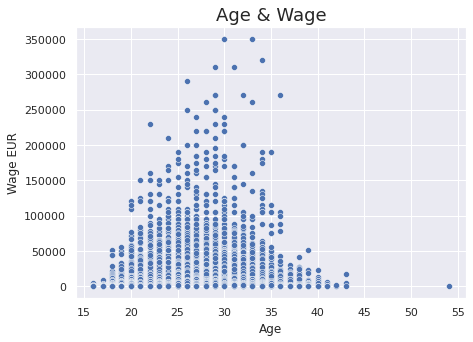

<Figure size 432x288 with 0 Axes>

In [ ]:
# Plotting Potential against Wage
plt.figure(figsize=(7, 5))
ax = sns.scatterplot(x =fifa_df['age'], y = fifa_df['wage_eur'])
plt.xlabel("Age") 
plt.ylabel("Wage EUR")
plt.title("Age & Wage", fontsize = 18)
plt.show()
plt.savefig('chart2.png')

### Relationship between Player Overall and Age

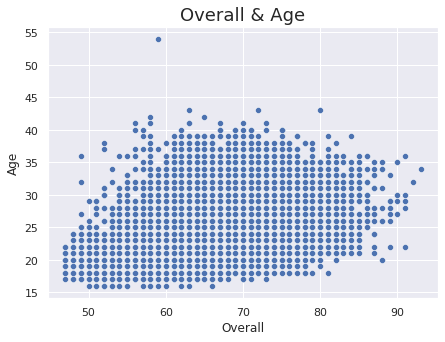

<Figure size 432x288 with 0 Axes>

In [ ]:
plt.figure(figsize=(7, 5))
ax = sns.scatterplot(x =fifa_df['overall'], y = fifa_df['age'])
plt.xlabel("Overall") 
plt.ylabel("Age")
plt.title("Overall & Age", fontsize = 18)
plt.show()
plt.savefig('chart3.png')


## Descriptive Analysis of FIFA 22 Player Ratings

### Who are the top 10 fastest players?

In this section I used the dataset to carry out descriptive analysis and answer questions like who the fastest player is, the best finisher, best player etc.

In [ ]:
# fastest players
player_name = fifa_df[["long_name",'age',"player_positions",'nationality_name','movement_sprint_speed',"movement_acceleration"]].nlargest(10, ['movement_acceleration']).set_index('long_name')
player_name

age player_positions  \
long_name                                                       
Kylian Mbappé Lottin                      22           ST, LW   
Adama Traoré Diarra                       25          RW, RWB   
Alphonso Boyle Davies                     20           LB, LM   
Moussa Diaby                              21           LW, RW   
Daniel James                              23           RM, LM   
Raheem Sterling                           26           LW, RW   
Achraf Hakimi Mouh                        22          RB, RWB   
Vinícius José Paixão de Oliveira Júnior   20               LW   
Carlos Uriel Antuna Romero                23       LM, RM, RW   
Chidera Ejuke                             23           LM, RM   

                                        nationality_name  \
long_name                                                  
Kylian Mbappé Lottin                              France   
Adama Traoré Diarra                                Spain   
Alphonso Boyle Davies                             Canada   
Moussa Diaby                                      France   
Daniel James                                       Wales   
Raheem Sterling                                  England   
Achraf Hakimi Mouh                               Morocco   
Vinícius José Paixão de Oliveira Júnior           Brazil   
Carlos Uriel Antuna Romero                        Mexico   
Chidera Ejuke                                    Nigeria   

                                         movement_sprint_speed  \
long_name                                                        
Kylian Mbappé Lottin                                        97   
Adama Traoré Diarra                                         96   
Alphonso Boyle Davies                                       96   
Moussa Diaby                                                92   
Daniel James                                                95   
Raheem Sterling                                             88   
Achraf Hakimi Mouh                                          95   
Vinícius José Paixão de Oliveira Júnior                     95   
Carlos Uriel Antuna Romero                                  90   
Chidera Ejuke                                               93   

                                         movement_acceleration  
long_name                                                       
Kylian Mbappé Lottin                                        97  
Adama Traoré Diarra                                         97  
Alphonso Boyle Davies                                       96  
Moussa Diaby                                                96  
Daniel James                                                96  
Raheem Sterling                                             95  
Achraf Hakimi Mouh                                          95  
Vinícius José Paixão de Oliveira Júnior                     95  
Carlos Uriel Antuna Romero                                  95  
Chidera Ejuke                                               95

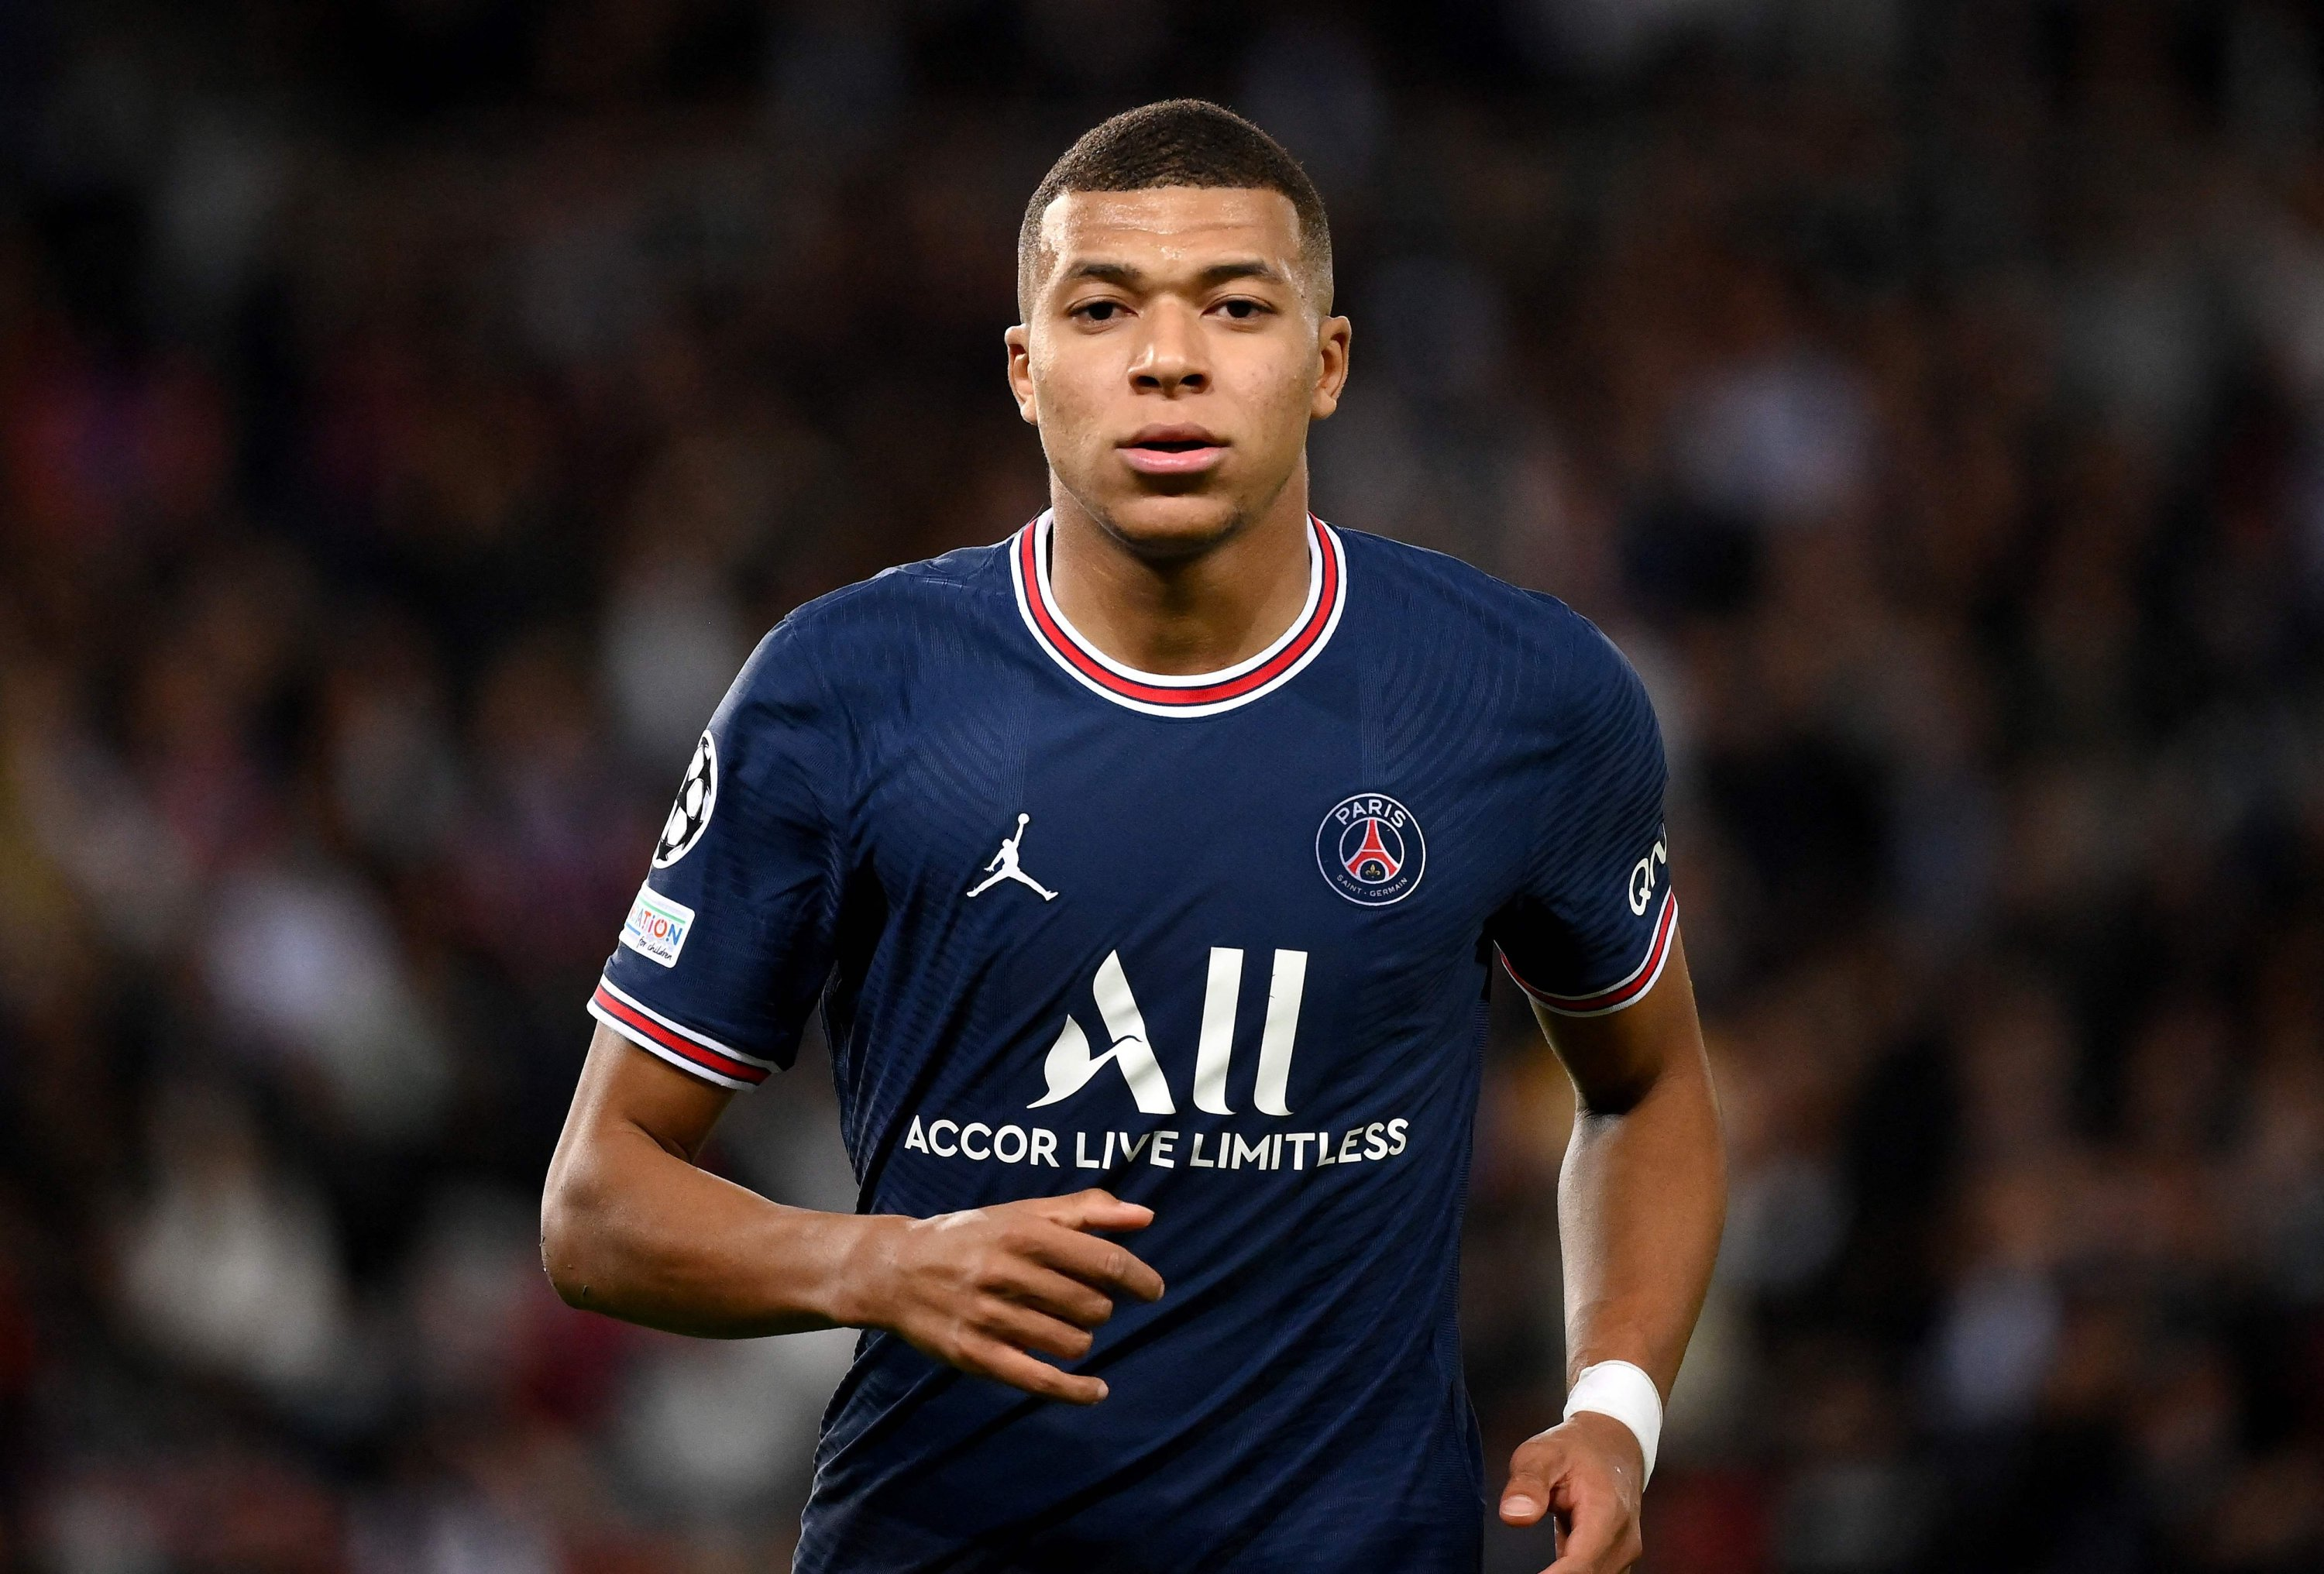

It can be seen that Kylian Mbappe Lottin of Paris Saint German is the fastest player in FIFA 22. Personally I feel using PSG is like cheating because they have so many good players:laughing:

### Who are the top 10 slowest players?

In [ ]:
# Top 10 Slowest Players
player_name = fifa_df[["long_name",'age',"player_positions",'nationality_name','movement_sprint_speed',"movement_acceleration"]].nsmallest(10, ['movement_acceleration']).set_index('long_name')
player_name

age player_positions nationality_name  \
long_name                                                               
Ryan Scott                       25               GK        Australia   
Romain Lejeune                   30               GK           France   
이윤오 Yun Oh Lee                   22               GK   Korea Republic   
Dominik Greif                    24               GK         Slovakia   
Nathael Walter Silbeira Caeiro   25               GK           Brazil   
Kevin Broll                      25               GK          Germany   
Tim Rönning                      22               GK           Sweden   
Đorđe Nikolić                    24               GK           Serbia   
Aynsley Pears                    23               GK          England   
Manuel Alexander Heredia Rojas   35               GK             Peru   

                                movement_sprint_speed  movement_acceleration  
long_name                                                                     
Ryan Scott                                         20                     14  
Romain Lejeune                                     17                     14  
이윤오 Yun Oh Lee                                     23                     14  
Dominik Greif                                      22                     15  
Nathael Walter Silbeira Caeiro                     16                     15  
Kevin Broll                                        15                     15  
Tim Rönning                                        21                     15  
Đorđe Nikolić                                      31                     15  
Aynsley Pears                                      16                     15  
Manuel Alexander Heredia Rojas                     27                     15

It can be seen that the slowest players in the game are all Goalkeepers.

### Who are the Top 10 Tallest Players? 

In [ ]:
# Tallest Players
player_name = fifa_df[["long_name",'age',"player_positions",'nationality_name','height_cm']].nlargest(10, ['height_cm']).set_index('long_name')
player_name

age player_positions nationality_name  height_cm
long_name                                                               
Tomáš Holý               29               GK   Czech Republic        206
Pape-Alioune Ndiaye      23          CB, CDM           France        203
Fejsal Mulić             26           ST, RM           Serbia        203
Andries Noppert          27               GK      Netherlands        203
Aaron James Chapman      31               GK          England        203
Vanja Milinković-Savić   24               GK           Serbia        202
Kjell Scherpen           21               GK      Netherlands        202
Nedeljko Stojišić        23               GK           Serbia        202
Cottrell Ezekwem         22               CB          Germany        202
Massamba Ndiaye          19               GK          Senegal        202

Unsurprisingly it can be seen that the tallest players are mostly Goalkeepers. Height is a very important trait of being a goalkeeper.

### Who are the top 10 shortest players?

In [ ]:
# Shortest Players
player_name = fifa_df[["long_name",'age',"player_positions",'nationality_name','height_cm']].nsmallest(10, ['height_cm']).set_index('long_name')
player_name

age player_positions nationality_name  \
long_name                                                                
Marco Antonio García Robledo      21               CM           Mexico   
Cristian Nahuel Barrios           23       LM, LW, CF        Argentina   
Leandro Gastón Paiva Santurión    27       RM, CM, LM          Uruguay   
Yeferson Julio Soteldo Martínez   24      LM, RM, CAM        Venezuela   
Maximiliano Nicol Moralez         34          CAM, CM        Argentina   
Chanathip Songkrasin              27               CF         Thailand   
Joshua Nisbet                     22      RM, CM, CDM        Australia   
Josué Misael Domínguez González   21          CAM, LM           Mexico   
Latif Blessing                    24           CM, RB            Ghana   
Erhun Aksel Öztümer               30              CAM          England   

                                 height_cm  
long_name                                   
Marco Antonio García Robledo           155  
Cristian Nahuel Barrios                156  
Leandro Gastón Paiva Santurión         156  
Yeferson Julio Soteldo Martínez        158  
Maximiliano Nicol Moralez              158  
Chanathip Songkrasin                   158  
Joshua Nisbet                          158  
Josué Misael Domínguez González        159  
Latif Blessing                         160  
Erhun Aksel Öztümer                    160

### Who are the top 10 heaviest players?

In [ ]:
# Top 10 Heaviest Players
player_name = fifa_df[["long_name",'age',"player_positions",'nationality_name','weight_kg']].nlargest(10, ['weight_kg']).set_index('long_name')
player_name

age player_positions        nationality_name  \
long_name                                                                
Saheed Adebayo Akinfenwa   39               ST                 England   
Christopher Seitz          34               GK           United States   
Lukas Watkowiak            25               GK                 Germany   
Mamadou Obbi Oularé        25               ST                 Belgium   
Lars Unnerstall            30               GK                 Germany   
Bilal Abdul Hamid          30               GK           United States   
Tomáš Holý                 29               GK          Czech Republic   
Eirik Holmen Johansen      28               GK                  Norway   
Asmir Begović              34               GK  Bosnia and Herzegovina   
Tomáš Chorý                26               ST          Czech Republic   

                          weight_kg  
long_name                            
Saheed Adebayo Akinfenwa        110  
Christopher Seitz               107  
Lukas Watkowiak                 105  
Mamadou Obbi Oularé             104  
Lars Unnerstall                 103  
Bilal Abdul Hamid               102  
Tomáš Holý                      102  
Eirik Holmen Johansen           102  
Asmir Begović                   101  
Tomáš Chorý                     101

It can be seen striker for League One club Wycombe Wanderers, Saheed Adebayo Akinfenwa weighs the most in FIFA 22.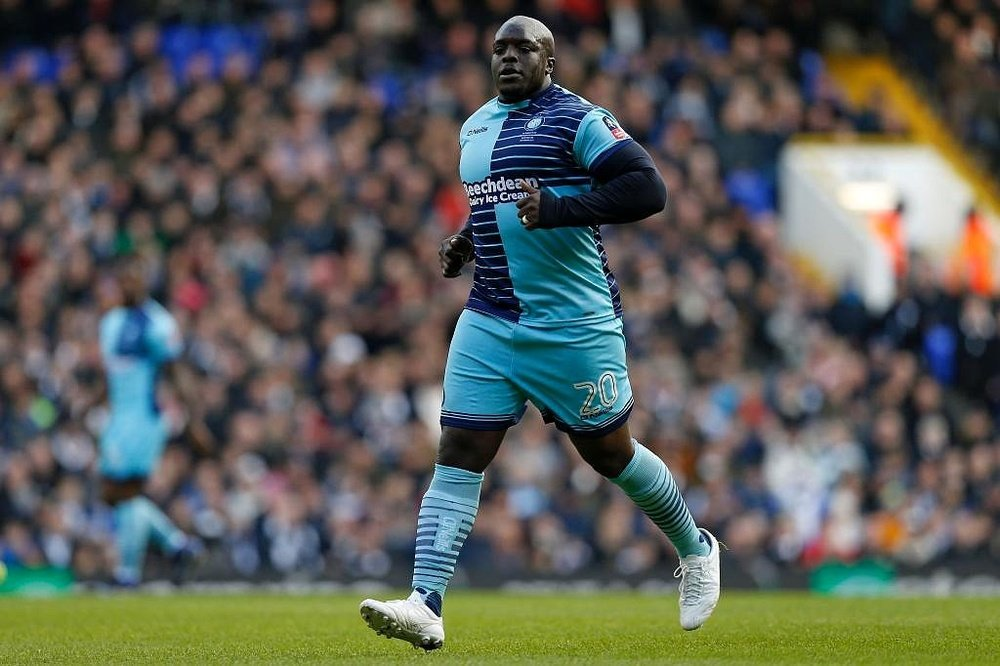

### Who are the top 10 oldest players?

In [ ]:
# Oldest Players
player_name = fifa_df[["long_name","player_positions",'nationality_name','age']].nlargest(10, ['age']).set_index('long_name')
player_name

player_positions        nationality_name  age
long_name                                                                 
三浦 知良                                      ST                   Japan   54
Gianluigi Buffon                           GK                   Italy   43
Cristian David Lucchetti                   GK               Argentina   43
中村 俊輔                             CAM, CF, RW                   Japan   43
Daniel Vaca Tasca                          GK                 Bolivia   42
Kevin Keith Ellison                    LM, ST                 England   42
Sebastián Alberto Torrico                  GK               Argentina   41
Artur Boruc                                GK                  Poland   41
Paulo César Da Silva Barrios               CB                Paraguay   41
Stojan Lukić                               GK  Bosnia and Herzegovina   41

It can be seen that Kazuyoshi Miura is the oldest player in FIFA 22. Miura holds the records for being the oldest goalscorer in the J-League, the footballer with the world's longest professional career and, as of 2022, is the oldest professional footballer in the world at 55.He also holds the possibly unique distinction of having played professional football in five separate decades (1980s–2020s). [Wikipedia](https://https://en.wikipedia.org/wiki/Kazuyoshi_Miura)
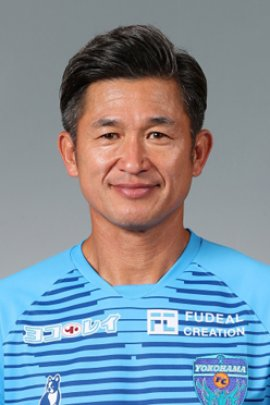

### Who are the top 10 youngest players?

In [ ]:
# Youngest Players
player_name = fifa_df[["long_name","player_positions",'nationality_name','age']].nsmallest(10, ['age']).set_index('long_name')
player_name

player_positions nationality_name  age
long_name                                                        
Pablo Martín Páez Gavira                 CM            Spain   16
Valentín Barco                           LB        Argentina   16
Alexios Kalogeropoulos                   CB           Greece   16
Pelayo González Rey                      CM            Spain   16
Rav van den Berg                         CB      Netherlands   16
Alexandru Musi                      LW, CAM          Romania   16
Thierry Small                            LB          England   16
Alfie Devine                        CM, CDM          England   16
Zak Emmerson                         CF, ST          England   16
Filip Bundgaard Kristensen           RM, ST          Denmark   16

### Top 10 Players Based on Defensive Awareness Rating

In [ ]:
player_name = fifa_df[["long_name","defending_marking_awareness","player_positions",'age','nationality_name']].nlargest(10, ['defending_marking_awareness']).set_index('long_name')
player_name

defending_marking_awareness  \
long_name                                                       
Giorgio Chiellini                                          93   
Virgil van Dijk                                            92   
N'Golo Kanté                                               90   
Rúben dos Santos Gato Alves Dias                           90   
Mats Hummels                                               90   
Kalidou Koulibaly                                          90   
Milan Škriniar                                             90   
Stefan Savić                                               90   
Marcos Aoás Corrêa                                         89   
Stefan de Vrij                                             89   

                                 player_positions  age nationality_name  
long_name                                                                
Giorgio Chiellini                              CB   36            Italy  
Virgil van Dijk                                CB   29      Netherlands  
N'Golo Kanté                              CDM, CM   30           France  
Rúben dos Santos Gato Alves Dias               CB   24         Portugal  
Mats Hummels                                   CB   32          Germany  
Kalidou Koulibaly                              CB   30          Senegal  
Milan Škriniar                                 CB   26         Slovakia  
Stefan Savić                                   CB   30       Montenegro  
Marcos Aoás Corrêa                        CB, CDM   27           Brazil  
Stefan de Vrij                                 CB   29      Netherlands

Giorgio Chiellini who plays for Juventus in Italy has the best Defensive Marking rating in FIFA 22.

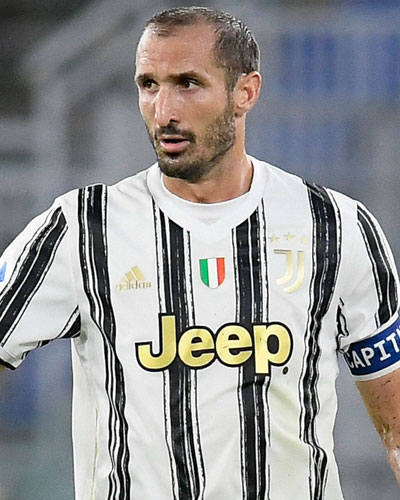

### Top 10 Players Based on their Long Passing Rating 

In [ ]:
player_name = fifa_df[["skill_long_passing","long_name","attacking_short_passing","power_stamina",'age','nationality_name','weight_kg','player_positions']].nlargest(10, ['skill_long_passing']).set_index('long_name')
player_name

skill_long_passing  attacking_short_passing  \
long_name                                                                     
Kevin De Bruyne                                 93                       94   
Toni Kroos                                      93                       93   
Paul Pogba                                      92                       88   
Lionel Andrés Messi Cuccittini                  91                       91   
Joshua Walter Kimmich                           90                       87   
Trent Alexander-Arnold                          90                       86   
Daniel Parejo Muñoz                             90                       92   
Luis Alberto Romero Alconchel                   90                       92   
Christian Dannemann Eriksen                     90                       89   
Luka Modrić                                     89                       91   

                                power_stamina  age nationality_name  \
long_name                                                             
Kevin De Bruyne                            89   30          Belgium   
Toni Kroos                                 75   31          Germany   
Paul Pogba                                 77   28           France   
Lionel Andrés Messi Cuccittini             72   34        Argentina   
Joshua Walter Kimmich                      94   26          Germany   
Trent Alexander-Arnold                     88   22          England   
Daniel Parejo Muñoz                        78   32            Spain   
Luis Alberto Romero Alconchel              75   28            Spain   
Christian Dannemann Eriksen                59   29          Denmark   
Luka Modrić                                83   35          Croatia   

                                weight_kg player_positions  
long_name                                                   
Kevin De Bruyne                        70          CM, CAM  
Toni Kroos                             76               CM  
Paul Pogba                             84           CM, LM  
Lionel Andrés Messi Cuccittini         72       RW, ST, CF  
Joshua Walter Kimmich                  75          CDM, RB  
Trent Alexander-Arnold                 69               RB  
Daniel Parejo Muñoz                    74               CM  
Luis Alberto Romero Alconchel          74      CAM, CM, CF  
Christian Dannemann Eriksen            76          CM, CAM  
Luka Modrić                            66               CM

Kevin De Bruyne is a mid field all rounder and its not surprising to see that he has the best long pass rating in FIFA 22.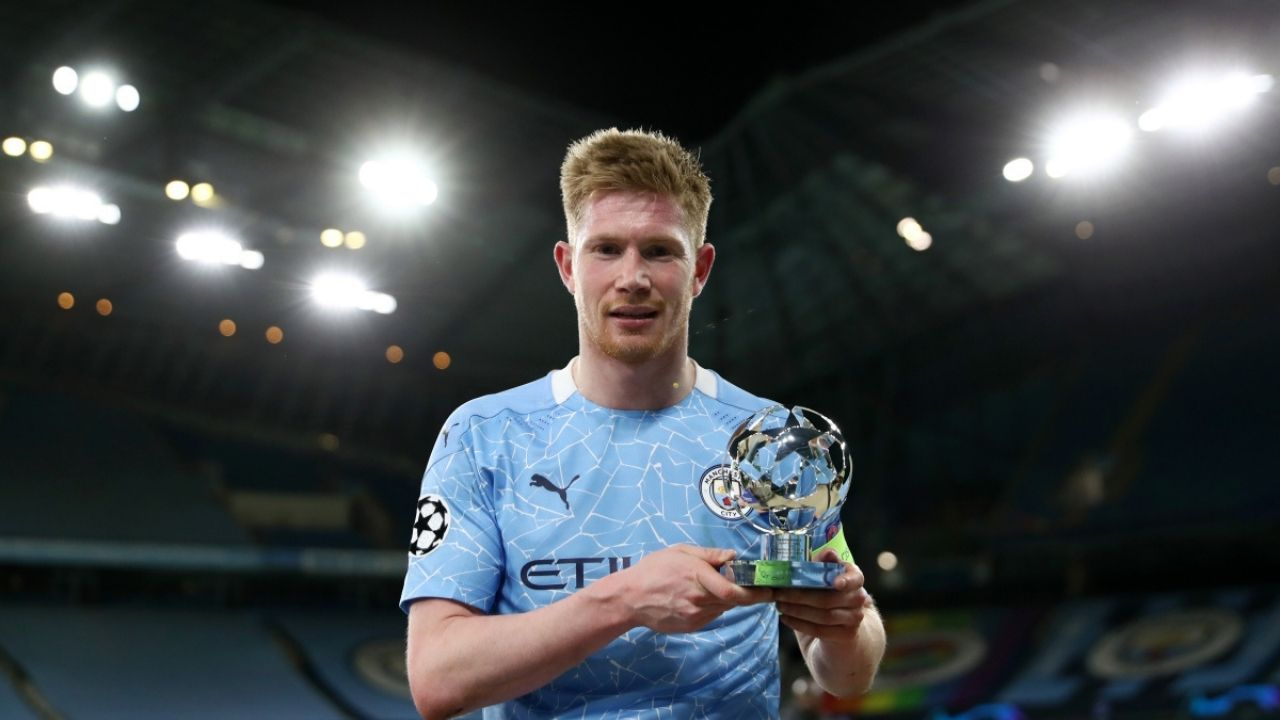

### Top 10 Players Based on the Dribbling Rating

In [ ]:
player_name = fifa_df[["dribbling","long_name","skill_ball_control","movement_agility",'age','nationality_name','weight_kg','player_positions']].nlargest(10, ['dribbling']).set_index('long_name')
player_name

dribbling  skill_ball_control  \
long_name                                                                
Lionel Andrés Messi Cuccittini                95.0                  96   
Neymar da Silva Santos Júnior                 94.0                  95   
Kylian Mbappé Lottin                          92.0                  91   
Marco Verratti                                91.0                  92   
Jadon Sancho                                  91.0                  90   
Bernardo Mota Veiga de Carvalho e Silva       91.0                  90   
Mohamed Salah Ghaly                           90.0                  89   
Paulo Bruno Exequiel Dybala                   90.0                  93   
Thiago Alcântara do Nascimento                90.0                  92   
Lorenzo Insigne                               90.0                  93   

                                         movement_agility  age  \
long_name                                                        
Lionel Andrés Messi Cuccittini                         91   34   
Neymar da Silva Santos Júnior                          96   29   
Kylian Mbappé Lottin                                   92   22   
Marco Verratti                                         91   28   
Jadon Sancho                                           91   21   
Bernardo Mota Veiga de Carvalho e Silva                94   26   
Mohamed Salah Ghaly                                    91   29   
Paulo Bruno Exequiel Dybala                            92   27   
Thiago Alcântara do Nascimento                         91   30   
Lorenzo Insigne                                        89   30   

                                        nationality_name  weight_kg  \
long_name                                                             
Lionel Andrés Messi Cuccittini                 Argentina         72   
Neymar da Silva Santos Júnior                     Brazil         68   
Kylian Mbappé Lottin                              France         73   
Marco Verratti                                     Italy         60   
Jadon Sancho                                     England         76   
Bernardo Mota Veiga de Carvalho e Silva         Portugal         64   
Mohamed Salah Ghaly                                Egypt         71   
Paulo Bruno Exequiel Dybala                    Argentina         75   
Thiago Alcântara do Nascimento                     Spain         70   
Lorenzo Insigne                                    Italy         59   

                                        player_positions  
long_name                                                 
Lionel Andrés Messi Cuccittini                RW, ST, CF  
Neymar da Silva Santos Júnior                    LW, CAM  
Kylian Mbappé Lottin                              ST, LW  
Marco Verratti                                   CM, CAM  
Jadon Sancho                                  RM, CF, LM  
Bernardo Mota Veiga de Carvalho e Silva      CAM, CM, RW  
Mohamed Salah Ghaly                                   RW  
Paulo Bruno Exequiel Dybala                      CF, CAM  
Thiago Alcântara do Nascimento                   CM, CDM  
Lorenzo Insigne                                   LW, CF

Lionel Messi who many people consider the GOAT(Greatest of All Time) is the best dribbler in FIFA 22.

### Top 10 Players Based on their Crossing Ability

In [ ]:
# Best Crosser of the Ball
player_name = fifa_df[["attacking_crossing","long_name","overall",'age','nationality_name','club_name']].nlargest(10, ['attacking_crossing']).set_index('long_name')
player_name

attacking_crossing  overall  age  \
long_name                                                           
Kevin De Bruyne                                  94       91   30   
Trent Alexander-Arnold                           92       87   22   
Joshua Walter Kimmich                            91       89   26   
Filip Kostić                                     91       84   28   
Pedro León Sánchez Gil                           91       78   34   
Philipp Martin Max                               90       80   27   
James David Rodríguez Rubio                      89       81   29   
James Ward-Prowse                                89       81   26   
Toni Kroos                                       88       88   31   
Ángel Fabián Di María Hernández                  88       87   33   

                                nationality_name            club_name  
long_name                                                              
Kevin De Bruyne                          Belgium      Manchester City  
Trent Alexander-Arnold                   England            Liverpool  
Joshua Walter Kimmich                    Germany    FC Bayern München  
Filip Kostić                              Serbia  Eintracht Frankfurt  
Pedro León Sánchez Gil                     Spain       CF Fuenlabrada  
Philipp Martin Max                       Germany                  PSV  
James David Rodríguez Rubio             Colombia              Everton  
James Ward-Prowse                        England          Southampton  
Toni Kroos                               Germany       Real Madrid CF  
Ángel Fabián Di María Hernández        Argentina  Paris Saint-Germain

KDB again 😀

#### Best Strikers based on their Finishing Ability

In [ ]:
# Best Striker by Overall shooting and attacking shit
player_name = fifa_df[['attacking_finishing','mentality_penalties', 'mentality_composure','pace', 'shooting',"long_name","overall",'age','nationality_name','club_name']].nlargest(10, ['attacking_finishing']).set_index('long_name')
player_name


attacking_finishing  mentality_penalties  \
long_name                                                                       
Lionel Andrés Messi Cuccittini                        95                   75   
Robert Lewandowski                                    95                   90   
Cristiano Ronaldo dos Santos Aveiro                   95                   88   
Harry Kane                                            94                   91   
Erling Braut Haaland                                  94                   76   
Kylian Mbappé Lottin                                  93                   79   
Luis Alberto Suárez Díaz                              93                   83   
Sergio Leonel Agüero del Castillo                     93                   75   
Romelu Lukaku Menama                                  92                   88   
Mohamed Salah Ghaly                                   91                   86   

                                     mentality_composure  pace  shooting  \
long_name                                                                  
Lionel Andrés Messi Cuccittini                        96  85.0      92.0   
Robert Lewandowski                                    88  78.0      92.0   
Cristiano Ronaldo dos Santos Aveiro                   95  87.0      94.0   
Harry Kane                                            91  70.0      91.0   
Erling Braut Haaland                                  84  89.0      91.0   
Kylian Mbappé Lottin                                  88  97.0      88.0   
Luis Alberto Suárez Díaz                              87  72.0      90.0   
Sergio Leonel Agüero del Castillo                     91  71.0      89.0   
Romelu Lukaku Menama                                  86  84.0      87.0   
Mohamed Salah Ghaly                                   90  90.0      87.0   

                                     overall  age nationality_name  \
long_name                                                            
Lionel Andrés Messi Cuccittini            93   34        Argentina   
Robert Lewandowski                        92   32           Poland   
Cristiano Ronaldo dos Santos Aveiro       91   36         Portugal   
Harry Kane                                90   27          England   
Erling Braut Haaland                      88   20           Norway   
Kylian Mbappé Lottin                      91   22           France   
Luis Alberto Suárez Díaz                  88   34          Uruguay   
Sergio Leonel Agüero del Castillo         87   33        Argentina   
Romelu Lukaku Menama                      88   28          Belgium   
Mohamed Salah Ghaly                       89   29            Egypt   

                                               club_name  
long_name                                                 
Lionel Andrés Messi Cuccittini       Paris Saint-Germain  
Robert Lewandowski                     FC Bayern München  
Cristiano Ronaldo dos Santos Aveiro    Manchester United  
Harry Kane                             Tottenham Hotspur  
Erling Braut Haaland                   Borussia Dortmund  
Kylian Mbappé Lottin                 Paris Saint-Germain  
Luis Alberto Suárez Díaz              Atlético de Madrid  
Sergio Leonel Agüero del Castillo           FC Barcelona  
Romelu Lukaku Menama                             Chelsea  
Mohamed Salah Ghaly                            Liverpool

Lionel Messi and Robert Lewandowski who plays for Bayern Munich in Germany are the best finishers in FIFA 22.

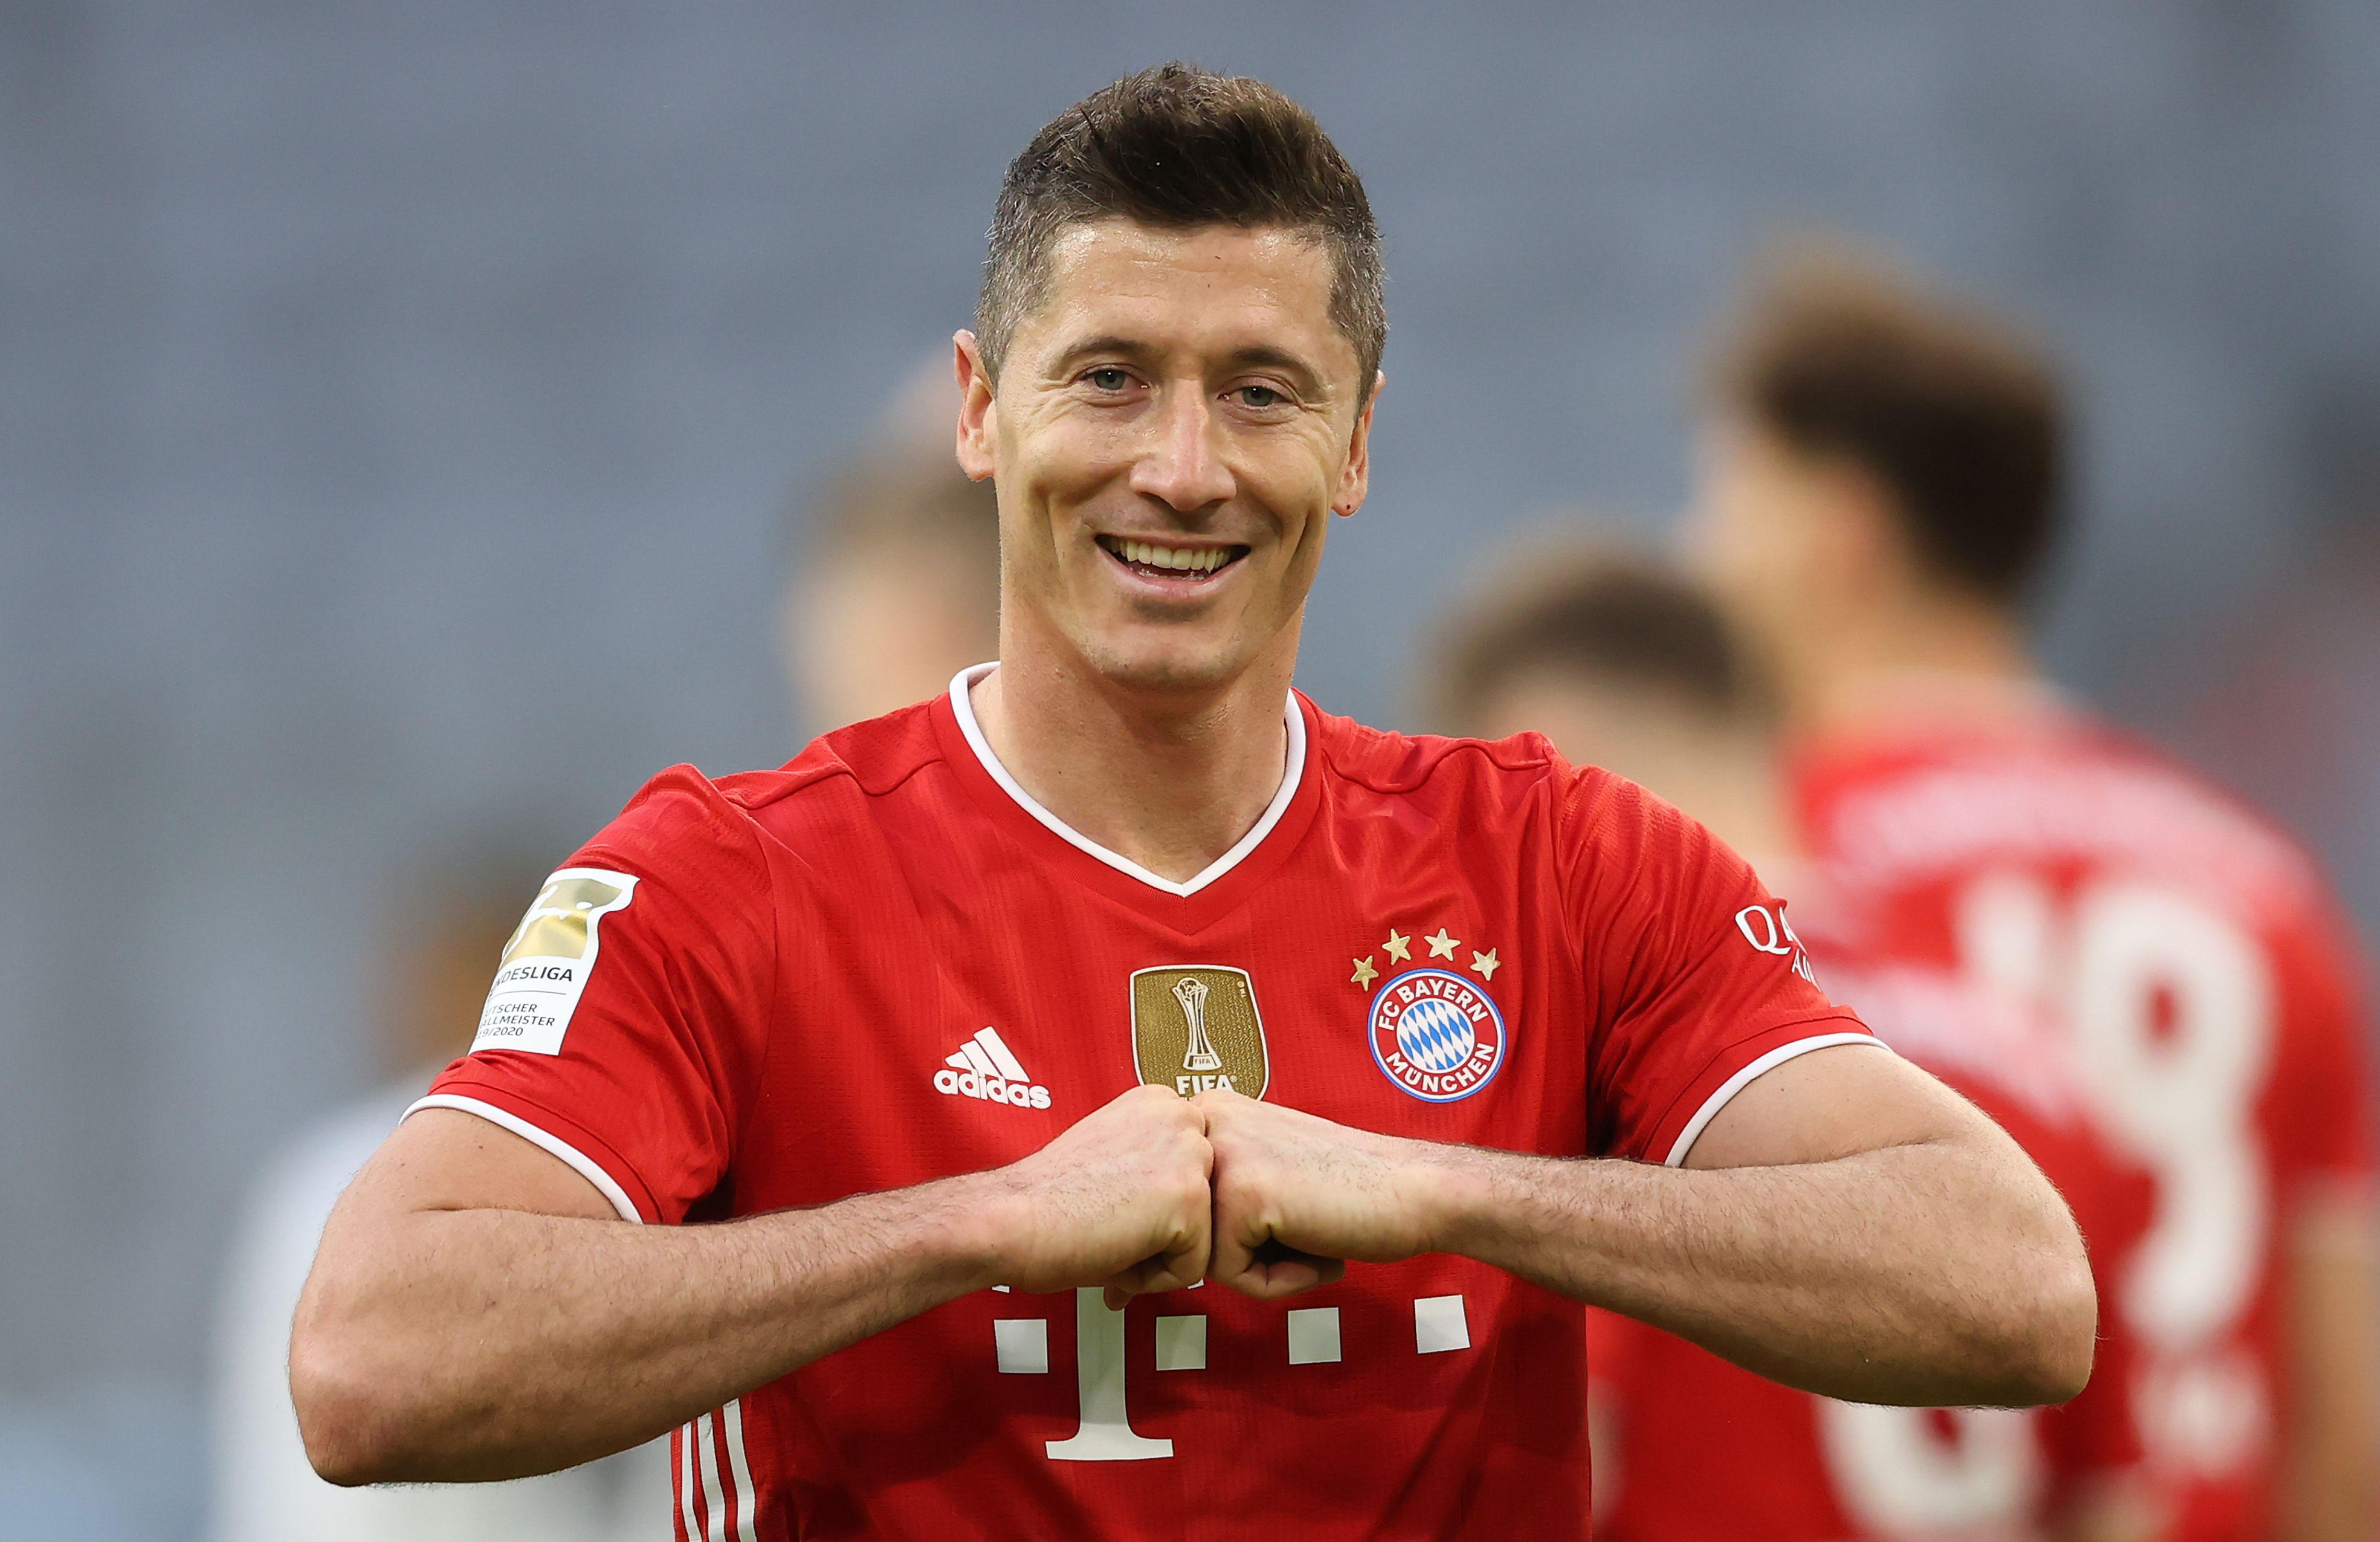

### Top Rated Players based on their Wages

In [ ]:
player_name = fifa_df[["wage_eur","long_name","value_eur","overall",'age','nationality_name','potential','club_name']].nlargest(10, ['wage_eur']).set_index('long_name')
player_name

wage_eur    value_eur  overall  age  \
long_name                                                                  
Kevin De Bruyne                      350000.0  125500000.0       91   30   
Karim Benzema                        350000.0   66000000.0       89   33   
Lionel Andrés Messi Cuccittini       320000.0   78000000.0       93   34   
Carlos Henrique Venancio Casimiro    310000.0   88000000.0       89   29   
Toni Kroos                           310000.0   75000000.0       88   31   
Raheem Sterling                      290000.0  107500000.0       88   26   
Robert Lewandowski                   270000.0  119500000.0       92   32   
Cristiano Ronaldo dos Santos Aveiro  270000.0   45000000.0       91   36   
Neymar da Silva Santos Júnior        270000.0  129000000.0       91   29   
Sadio Mané                           270000.0  101000000.0       89   29   

                                    nationality_name  potential  \
long_name                                                         
Kevin De Bruyne                              Belgium         91   
Karim Benzema                                 France         89   
Lionel Andrés Messi Cuccittini             Argentina         93   
Carlos Henrique Venancio Casimiro             Brazil         89   
Toni Kroos                                   Germany         88   
Raheem Sterling                              England         89   
Robert Lewandowski                            Poland         92   
Cristiano Ronaldo dos Santos Aveiro         Portugal         91   
Neymar da Silva Santos Júnior                 Brazil         91   
Sadio Mané                                   Senegal         89   

                                               club_name  
long_name                                                 
Kevin De Bruyne                          Manchester City  
Karim Benzema                             Real Madrid CF  
Lionel Andrés Messi Cuccittini       Paris Saint-Germain  
Carlos Henrique Venancio Casimiro         Real Madrid CF  
Toni Kroos                                Real Madrid CF  
Raheem Sterling                          Manchester City  
Robert Lewandowski                     FC Bayern München  
Cristiano Ronaldo dos Santos Aveiro    Manchester United  
Neymar da Silva Santos Júnior        Paris Saint-Germain  
Sadio Mané                                     Liverpool

KDB and Karim Benzema who plays as a striker for Real Madrid in Spain are the highest paid players in FIFA 22 and rightly so they're incredible players.

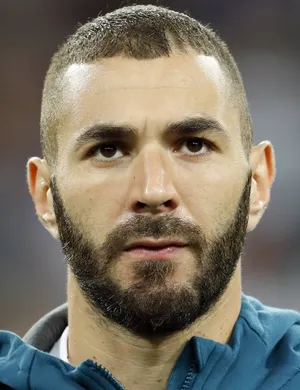

### Top 10 Best Goalkeepers

In [ ]:
player_name = fifa_df[['goalkeeping_diving', 'goalkeeping_handling', 'goalkeeping_kicking', 'goalkeeping_positioning', 'goalkeeping_reflexes', 'goalkeeping_speed',"long_name","overall",'age','nationality_name','club_name']].nlargest(10, ['goalkeeping_diving']).set_index('long_name')
player_name

goalkeeping_diving  goalkeeping_handling  \
long_name                                                             
Gianluigi Donnarumma                       91                    83   
Keylor Navas Gamboa                        89                    84   
Manuel Peter Neuer                         88                    88   
Marc-André ter Stegen                      88                    85   
Hugo Lloris                                88                    83   
Jan Oblak                                  87                    92   
Ederson Santana de Moraes                  87                    82   
Alisson Ramsés Becker                      86                    86   
Wojciech Tomasz Szczęsny                   86                    82   
David De Gea Quintana                      86                    79   

                           goalkeeping_kicking  goalkeeping_positioning  \
long_name                                                                 
Gianluigi Donnarumma                        79                       85   
Keylor Navas Gamboa                         75                       87   
Manuel Peter Neuer                          91                       89   
Marc-André ter Stegen                       88                       88   
Hugo Lloris                                 65                       84   
Jan Oblak                                   78                       90   
Ederson Santana de Moraes                   93                       88   
Alisson Ramsés Becker                       84                       90   
Wojciech Tomasz Szczęsny                    73                       87   
David De Gea Quintana                       76                       79   

                           goalkeeping_reflexes  goalkeeping_speed  overall  \
long_name                                                                     
Gianluigi Donnarumma                         90               52.0       89   
Keylor Navas Gamboa                          89               54.0       88   
Manuel Peter Neuer                           88               56.0       90   
Marc-André ter Stegen                        90               43.0       90   
Hugo Lloris                                  90               61.0       87   
Jan Oblak                                    90               50.0       91   
Ederson Santana de Moraes                    88               64.0       89   
Alisson Ramsés Becker                        89               52.0       89   
Wojciech Tomasz Szczęsny                     88               49.0       87   
David De Gea Quintana                        87               57.0       84   

                           age nationality_name            club_name  
long_name                                                             
Gianluigi Donnarumma        22            Italy  Paris Saint-Germain  
Keylor Navas Gamboa         34       Costa Rica  Paris Saint-Germain  
Manuel Peter Neuer          35          Germany    FC Bayern München  
Marc-André ter Stegen       29          Germany         FC Barcelona  
Hugo Lloris                 34           France    Tottenham Hotspur  
Jan Oblak                   28         Slovenia   Atlético de Madrid  
Ederson Santana de Moraes   27           Brazil      Manchester City  
Alisson Ramsés Becker       28           Brazil            Liverpool  
Wojciech Tomasz Szczęsny    31           Poland             Juventus  
David De Gea Quintana       30            Spain    Manchester United

These are the top 10 Goalkeepers in FIFA 22 and their respective Goalkeeper related ratings.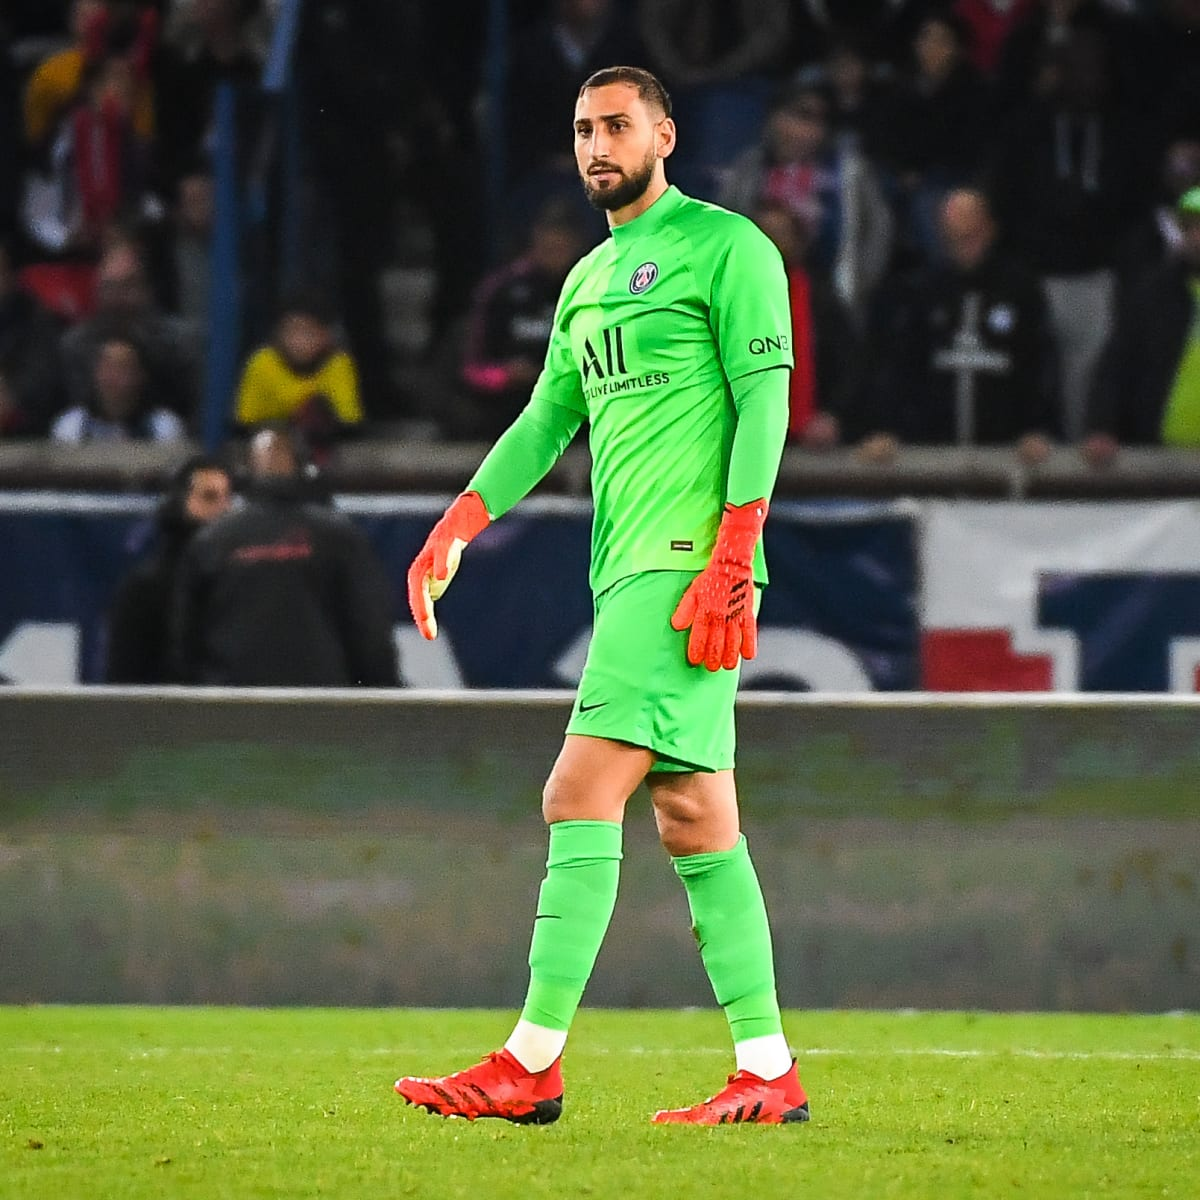

## Summary
In summary I've been able to answer the following questions through visual and descriptive analysis:
* Who are the top 10 fastest players?
* Who are the top 10 slowest players?
* Who are the Top 10 Tallest Players?
* Who are the top 10 shortest players?
* Who are the top 10 heaviest players?
* Who are the top 10 oldest players?
* Who are the top 10 youngest players?

I've also been able to list out the best players based oon respective ratings :
* Top 20 Best FIFA 22 Players Based on Overall Rating
* Players Preferred foot
* Top 10 Highest Paid Players in FIFA 22 and their Respective Nationalities
* Top 10 Highest Paid Players and their Clubs
* Top 10 Players Based on Defensive Awareness Rating
* Top 10 Players Based on their Long Passing Rating
* Top 10 Players Based on the Dribbling Rating
* Top 10 Players Based on their Crossing Ability
* Best Strikers based on their Finishing Ability
* Top Rated Players based on their Wages
* Top 10 Best Goalkeepers.

I also showed the distribution and relationship of certain player features such as:
* Player Height Distribution
* Degrees of Players and Skill Moves Rating
* Relationship between Player Potential and Wage
* Relationship between Age and Wage
* Relationship between Player Overall and Age.



